<a href="https://colab.research.google.com/github/Klevertak/SensorPrediction/blob/dev/SensorPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os

Load data

In [2]:
DATA_PATH="/content/drive/MyDrive/Data/Dataset1"

In [3]:
X_train = np.load(os.path.join(DATA_PATH, 'X_train.npy'))

In [4]:
X_train[0,:,1]

array([-0.1232167, -0.1268756, -0.1240037, -0.1249279, -0.1257667,
       -0.124462 , -0.1273606, -0.1278912, -0.1258682, -0.1243682,
       -0.1231382, -0.1213345, -0.1183578, -0.120062 , -0.1221186,
       -0.12008  , -0.1209017, -0.1213949, -0.1215677, -0.1246812,
       -0.1254896, -0.1249345, -0.1249063, -0.1249926, -0.1251552,
       -0.1247985, -0.1254793, -0.1268068, -0.1272888, -0.123713 ,
       -0.1192631, -0.1226967, -0.1271224, -0.126278 , -0.1261419,
       -0.1251686, -0.121594 , -0.1190558, -0.1179128, -0.1174034,
       -0.1172102, -0.1181487, -0.1185709, -0.1179084, -0.1205067,
       -0.1243031, -0.1256299, -0.1246896, -0.1218014, -0.1202801,
       -0.1206562, -0.1210648, -0.1216185, -0.1241114, -0.1280997,
       -0.1280257, -0.126537 , -0.1274474, -0.1273523, -0.1264597,
       -0.1247455, -0.1236691, -0.1229069, -0.1215528, -0.123976 ,
       -0.1268078, -0.1277862, -0.1266547, -0.1236336, -0.1249187,
       -0.1243005, -0.1197982, -0.1192223, -0.120174 , -0.1213

In [5]:
y_train =  np.load(os.path.join(DATA_PATH, 'y_train.npy'))

In [6]:
y_train.shape

(7352, 6)

In [7]:
X_test = np.load(os.path.join(DATA_PATH, 'X_test.npy'))

In [8]:
X_test.shape

(2947, 128, 9)

In [9]:
y_test = np.load(os.path.join(DATA_PATH, 'y_test.npy'))

In [10]:
y_test.shape

(2947, 6)

Analysis

In [11]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [12]:
from scipy import signal

In [13]:
import matplotlib
from matplotlib import pyplot as plt

In [14]:
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

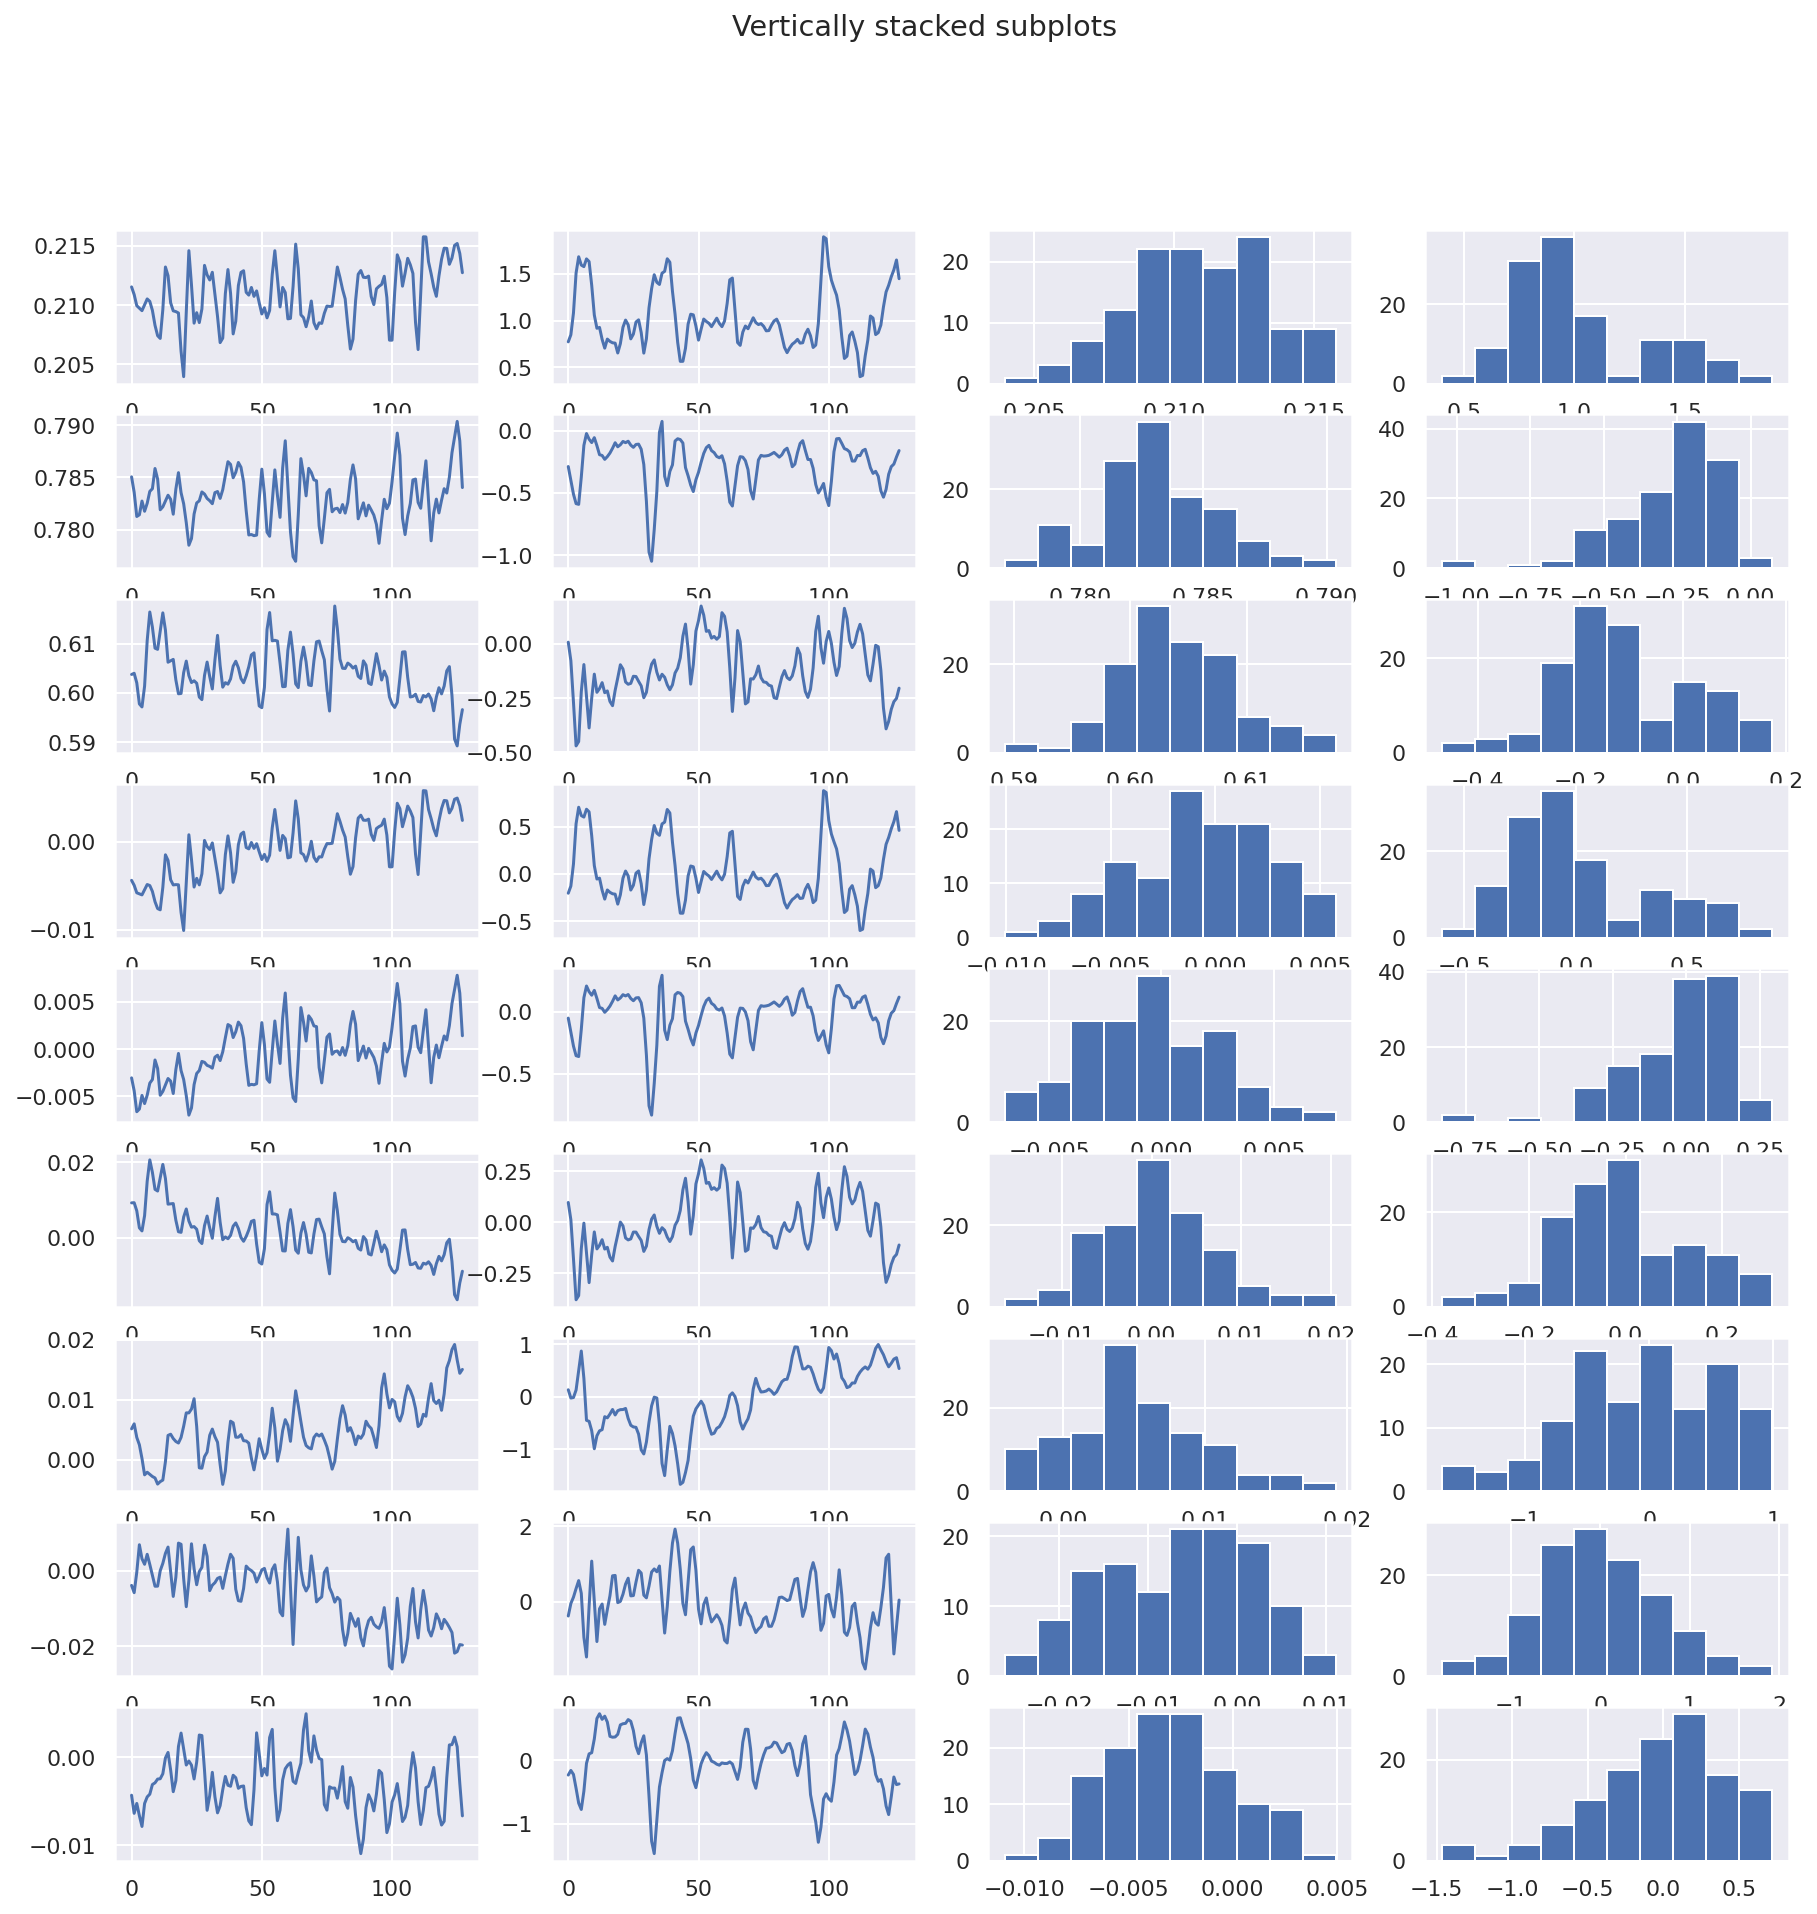

In [15]:
sens_count = 9

plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(sens_count,4)
fig.suptitle('Vertically stacked subplots')

for i in range(0,sens_count):
  axs[i,0].plot(X_train[3501,:,i])
  axs[i,1].plot(X_train[300,:,i])
  axs[i,2].hist(X_train[3501,:,i])
  axs[i,3].hist(X_train[300,:,i])  

###Displat classes counts in train and test datasets

In [16]:
class_counts_train = np.sum(y_train, axis=0)
class_counts_test = np.sum(y_test, axis=0)

<BarContainer object of 6 artists>

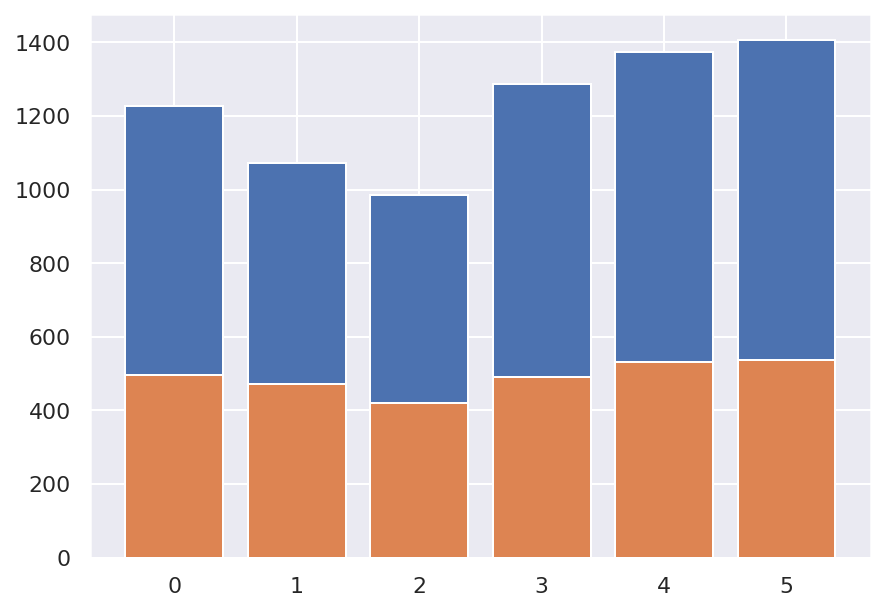

In [17]:
plt.rcParams["figure.figsize"] = (7,5)
plt.bar(range(0,6),height=class_counts_train)
plt.bar(range(0,6),height=class_counts_test)

In [18]:
class_counts_train

array([1226., 1073.,  986., 1286., 1374., 1407.])

In [19]:
f, t, Zxx = signal.stft(X_train[3501,:,0], fs=16, nperseg=16)

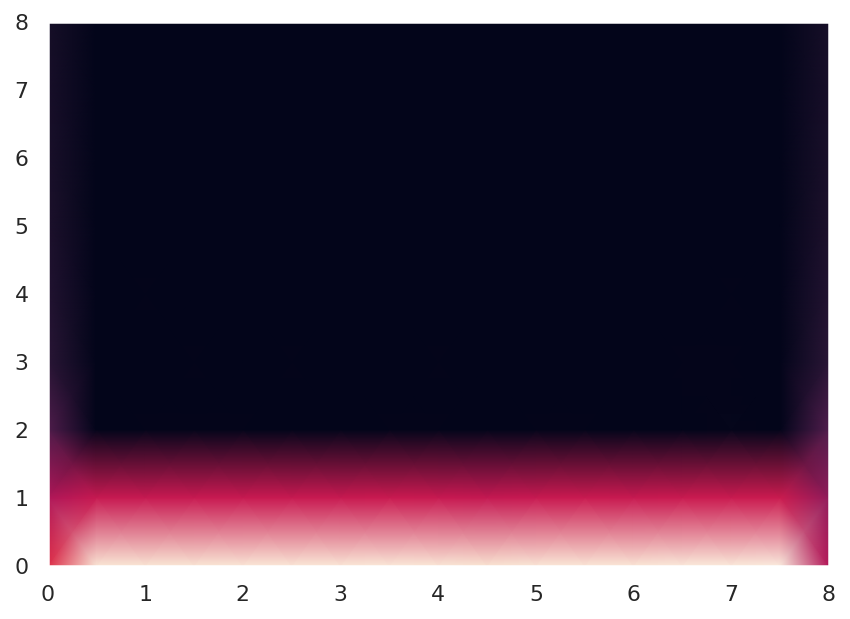

In [20]:
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')

In [21]:
X_train.shape

(7352, 128, 9)

## Creating Dataframe from numpy

In [22]:
arrays = [
    [s for s in range(9) for v in range(128)],
    [v  for s in range(9) for v in range(128)],
]

In [23]:
tuples = list(zip(*arrays))

In [24]:
index = pd.MultiIndex.from_tuples(tuples, names=["sensor", "val"])

In [25]:
index

MultiIndex([(0,   0),
            (0,   1),
            (0,   2),
            (0,   3),
            (0,   4),
            (0,   5),
            (0,   6),
            (0,   7),
            (0,   8),
            (0,   9),
            ...
            (8, 118),
            (8, 119),
            (8, 120),
            (8, 121),
            (8, 122),
            (8, 123),
            (8, 124),
            (8, 125),
            (8, 126),
            (8, 127)],
           names=['sensor', 'val'], length=1152)

In [26]:
np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])).shape

(7352, 1152)

In [27]:
df_train = pd.DataFrame(np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])), columns=index)

In [28]:
df_train

sensor         0                      ...         8                    
val          0         1         2    ...       125       126       127
0       1.012817  1.022833  1.022028  ... -0.002170 -0.005643 -0.001446
1       1.018851  1.022380  1.020781  ...  0.005045 -0.004424 -0.002798
2       1.023127  1.021882  1.019178  ... -0.005566 -0.003702 -0.002645
3       1.017682  1.018149  1.019854  ... -0.008408 -0.011158 -0.012987
4       1.019952  1.019616  1.020933  ... -0.004491 -0.003441 -0.010082
...          ...       ...       ...  ...       ...       ...       ...
7347    1.374753  1.604501  1.759656  ...  0.105364  0.192774  0.251018
7348    1.713028  1.709944  1.321608  ...  0.319005  0.231496  0.234651
7349    0.754892  0.804314  0.831714  ...  0.254344  0.281431  0.254206
7350    0.927927  0.912987  0.924660  ...  0.176212  0.163561  0.188734
7351    0.798091  0.819242  0.865882  ... -0.362512 -0.383989 -0.335884

[7352 rows x 1152 columns]

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 1152 entries, (0, 0) to (8, 127)
dtypes: float64(1152)
memory usage: 64.6 MB


In [30]:
df_train.to_numpy().shape

(7352, 1152)

### Add target variable

In [31]:
df_train['target'] =  np.argmax(y_train, axis=1)

In [32]:
df_train

sensor         0                      ...         8           target
val            0         1         2  ...       126       127       
0       1.012817  1.022833  1.022028  ... -0.005643 -0.001446      4
1       1.018851  1.022380  1.020781  ... -0.004424 -0.002798      4
2       1.023127  1.021882  1.019178  ... -0.003702 -0.002645      4
3       1.017682  1.018149  1.019854  ... -0.011158 -0.012987      4
4       1.019952  1.019616  1.020933  ... -0.003441 -0.010082      4
...          ...       ...       ...  ...       ...       ...    ...
7347    1.374753  1.604501  1.759656  ...  0.192774  0.251018      1
7348    1.713028  1.709944  1.321608  ...  0.231496  0.234651      1
7349    0.754892  0.804314  0.831714  ...  0.281431  0.254206      1
7350    0.927927  0.912987  0.924660  ...  0.163561  0.188734      1
7351    0.798091  0.819242  0.865882  ... -0.383989 -0.335884      1

[7352 rows x 1153 columns]

## Visualising dataset(first 3 PCA components)

In [33]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_train.drop(['target'],axis=1).to_numpy())

In [34]:
# df_train.drop(['target'],axis=1).to_numpy()

In [35]:
pca_result.shape

(7352, 3)

No handles with labels found to put in legend.


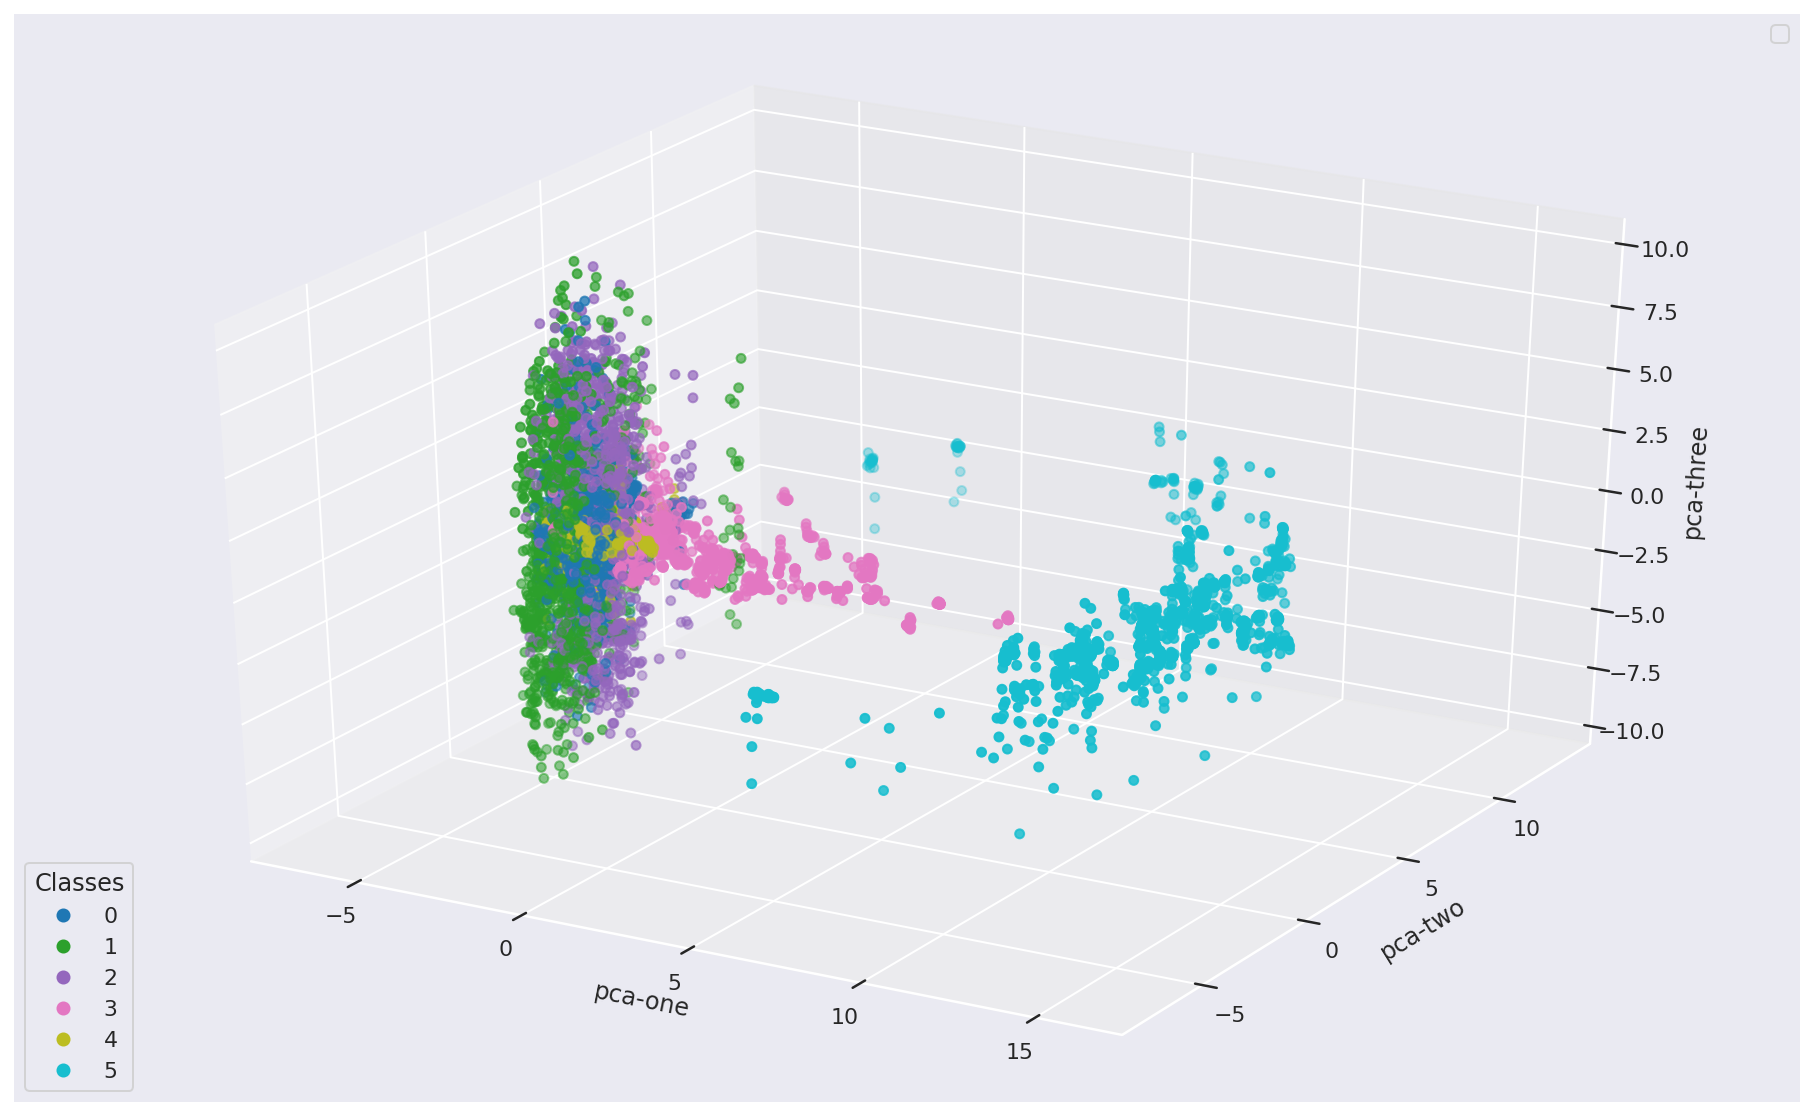

In [36]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
          xs=pca_result[:,0], 
          ys=pca_result[:,1], 
          zs=pca_result[:,2], 
          c=df_train['target'], 
          cmap='tab10'          
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.legend()
plt.show()

In [37]:
import plotly.express as px

fig = px.scatter_3d(pca_result, x=0, y=1, z=2,
              color=df_train['target'])
fig.show()

In [38]:
def getSpherical_np(xyz):
    ptsnew = np.zeros(xyz.shape)
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,0] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,1] = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    #ptsnew[:,1] = np.arctan2(xyz[:,2], np.sqrt(xy)) # for elevation angle defined from XY-plane up
    ptsnew[:,2] = np.arctan2(xyz[:,1], xyz[:,0])
    return ptsnew

In [39]:
pca_result_polar = getSpherical_np(pca_result)

In [40]:
pca_result.shape, pca_result_polar.shape

((7352, 3), (7352, 3))

In [41]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 20, 100)
x, y, z = np.cos(t), np.sin(t), t

fig = go.Figure(data=[go.Scatter3d(
    x=pca_result_polar[:,0],
    y=pca_result_polar[:,1],
    z=pca_result_polar[:,2],
    mode='markers',
    marker=dict(
        size=12,
        color=df_train['target'],       # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### Reshape dataset

In [42]:
X = np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))

### Create dataset with new features

In [43]:
sensor_mean_list=[]
sensor_std_list =[]

In [44]:
for r in range(9):  
  sensor_mean_list.append(np.mean(X[:,r*128:(r+1)*128],axis=1))
  sensor_std_list.append(np.std(X[:,r*128:(r+1)*128],axis=1))

In [45]:
sensor_mean_list = np.swapaxes(np.vstack(sensor_mean_list),0,1)
sensor_std_list = np.swapaxes(np.vstack(sensor_std_list),0,1)

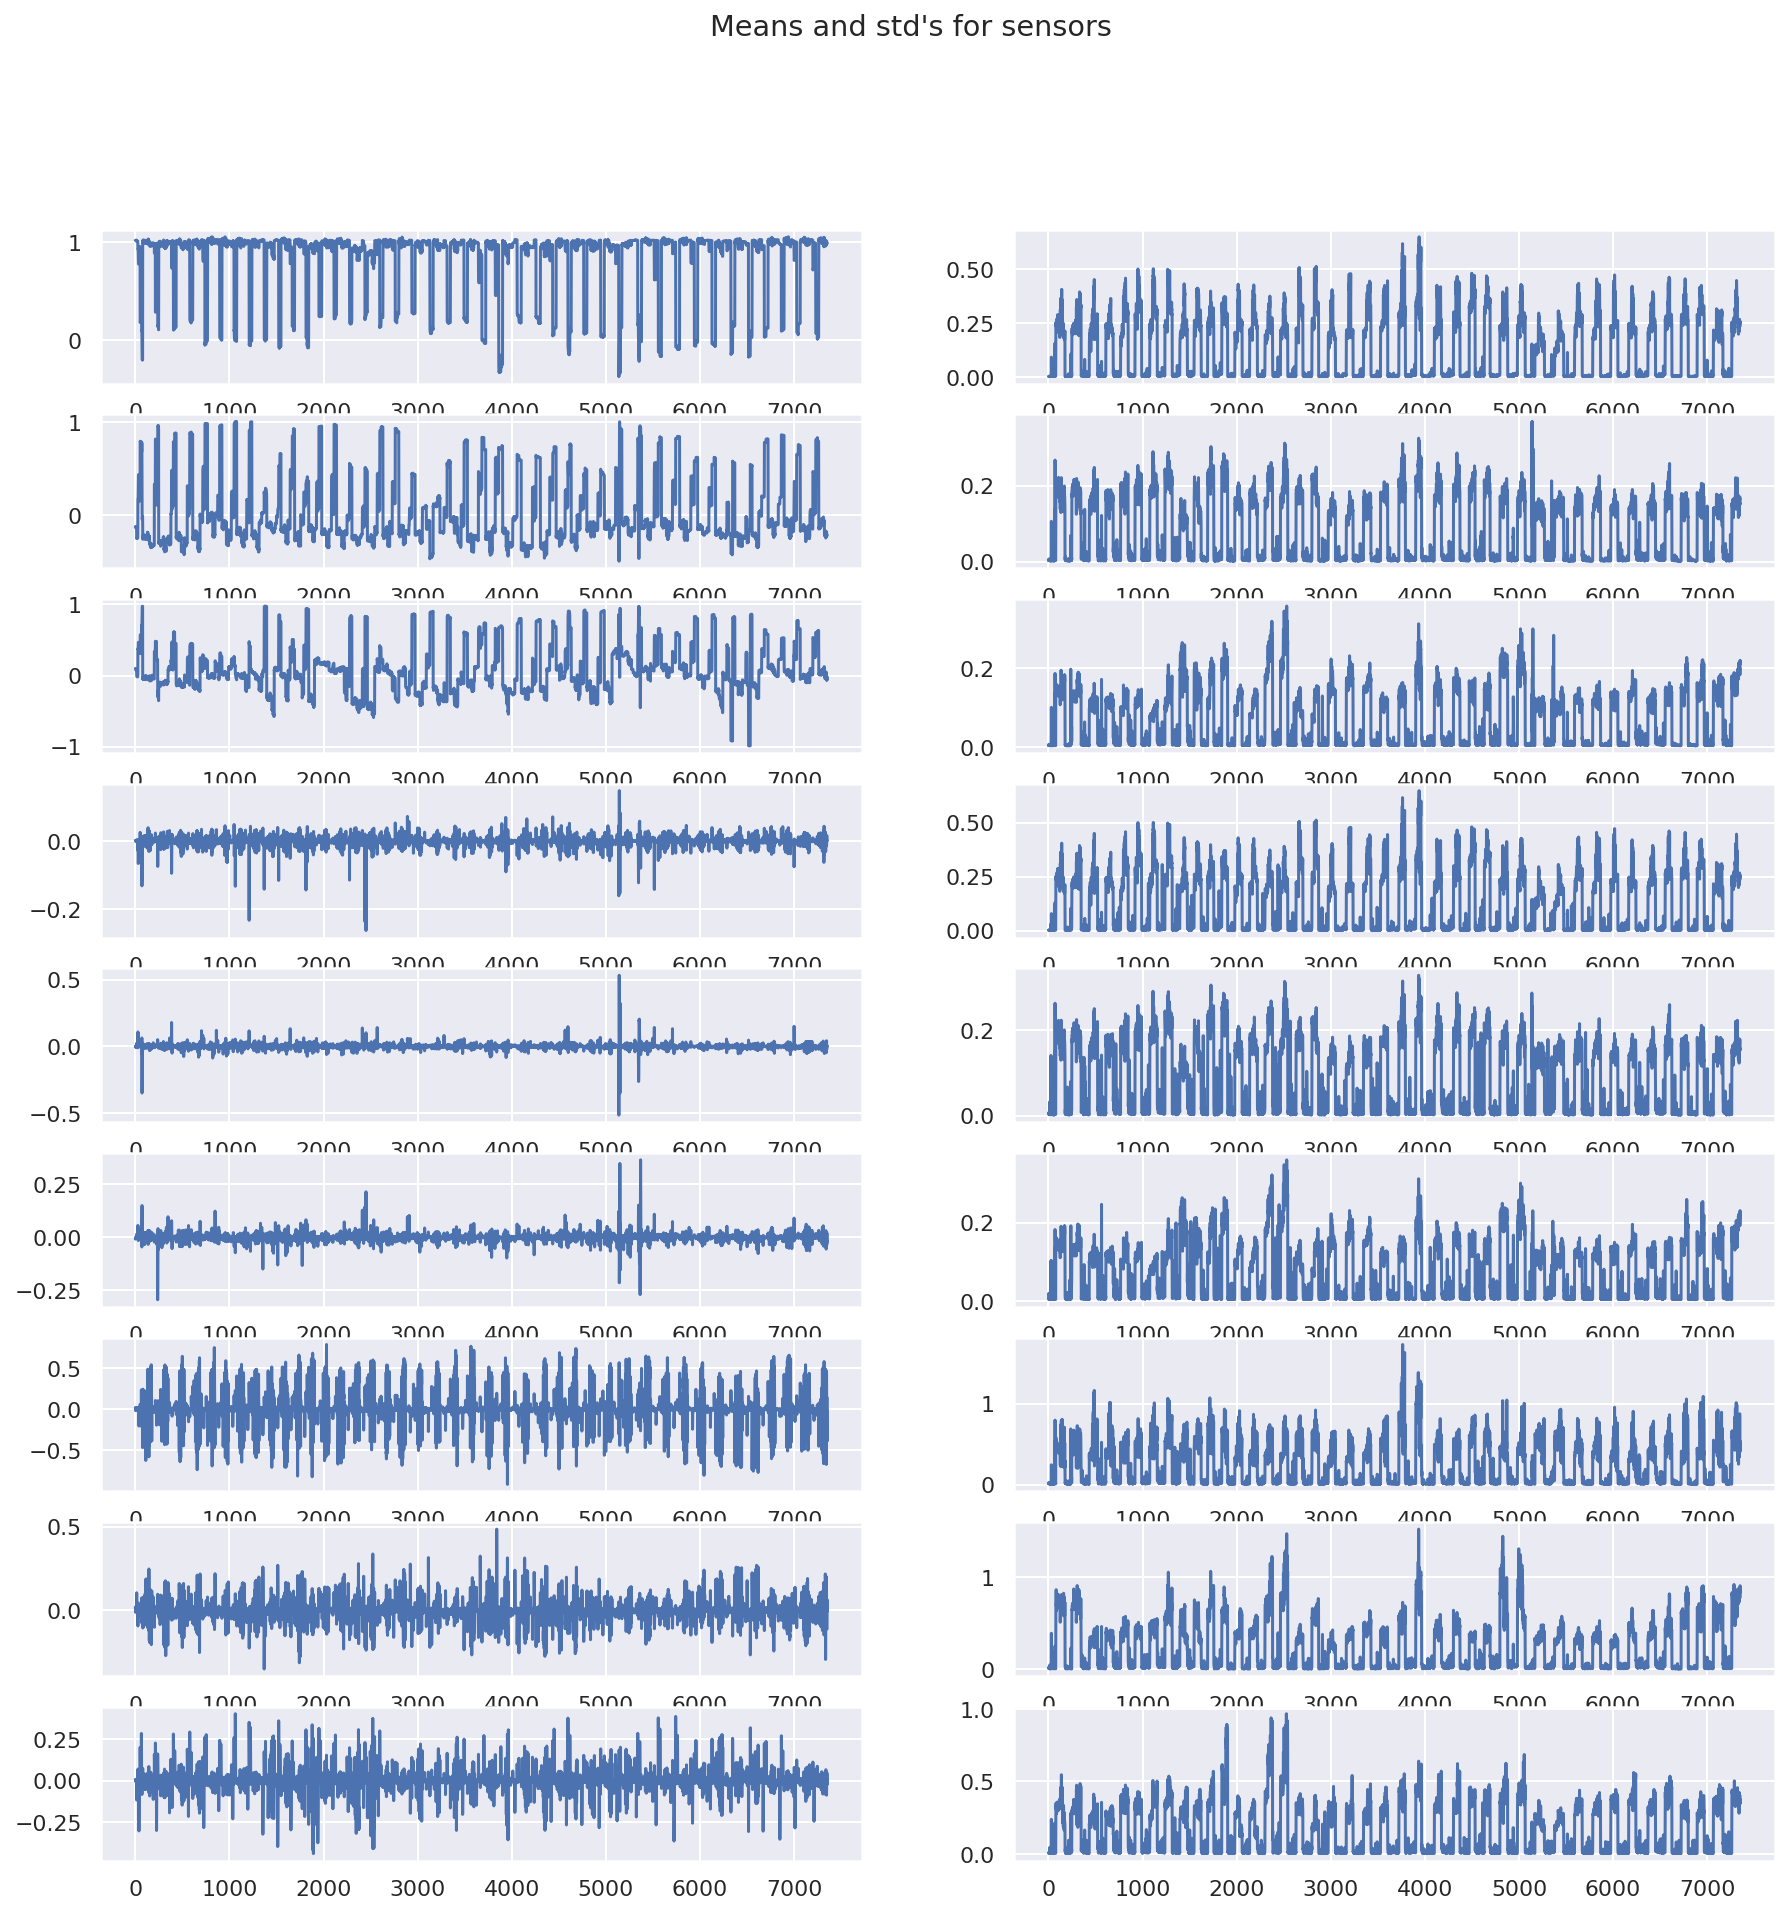

In [46]:
sens_count = 9

plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(sens_count,2)
fig.suptitle('Means and std\'s for sensors')

for i in range(0,sens_count):
  axs[i,0].plot(sensor_mean_list[:,i])
  axs[i,1].plot(sensor_std_list[:,i])

In [47]:
df1 = pd.DataFrame(
    sensor_mean_list,     
    columns=['mean_'+str(i) for i in range(9)]
)

In [48]:
df1 = df1.join(
    pd.DataFrame(
        sensor_mean_list,     
        index=df1.index,
        columns=['std_'+str(i) for i in range(9)]
        )
    )

In [49]:
df1['target'] =  np.argmax(y_train, axis=1)

In [50]:
df1

mean_0    mean_1    mean_2  ...     std_7     std_8  target
0     1.019305 -0.124262  0.099732  ...  0.019403  0.009468       4
1     1.019448 -0.122936  0.096939  ... -0.004314  0.006308       4
2     1.019927 -0.124997  0.092897  ... -0.012640  0.004335       4
3     1.020349 -0.130493  0.087654  ... -0.007697 -0.000352       4
4     1.020255 -0.130209  0.084999  ... -0.000166 -0.003957       4
...        ...       ...       ...  ...       ...       ...     ...
7347  0.993124 -0.224678 -0.068424  ... -0.008430  0.016854       1
7348  0.984407 -0.218768 -0.057635  ... -0.009665 -0.023482       1
7349  0.985348 -0.218529 -0.010961  ...  0.051317  0.049415       1
7350  0.990478 -0.215775 -0.026930  ...  0.064625  0.040335       1
7351  1.000666 -0.212469 -0.057684  ... -0.112046 -0.021280       1

[7352 rows x 19 columns]

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean_0  7352 non-null   float64
 1   mean_1  7352 non-null   float64
 2   mean_2  7352 non-null   float64
 3   mean_3  7352 non-null   float64
 4   mean_4  7352 non-null   float64
 5   mean_5  7352 non-null   float64
 6   mean_6  7352 non-null   float64
 7   mean_7  7352 non-null   float64
 8   mean_8  7352 non-null   float64
 9   std_0   7352 non-null   float64
 10  std_1   7352 non-null   float64
 11  std_2   7352 non-null   float64
 12  std_3   7352 non-null   float64
 13  std_4   7352 non-null   float64
 14  std_5   7352 non-null   float64
 15  std_6   7352 non-null   float64
 16  std_7   7352 non-null   float64
 17  std_8   7352 non-null   float64
 18  target  7352 non-null   int64  
dtypes: float64(18), int64(1)
memory usage: 1.1 MB


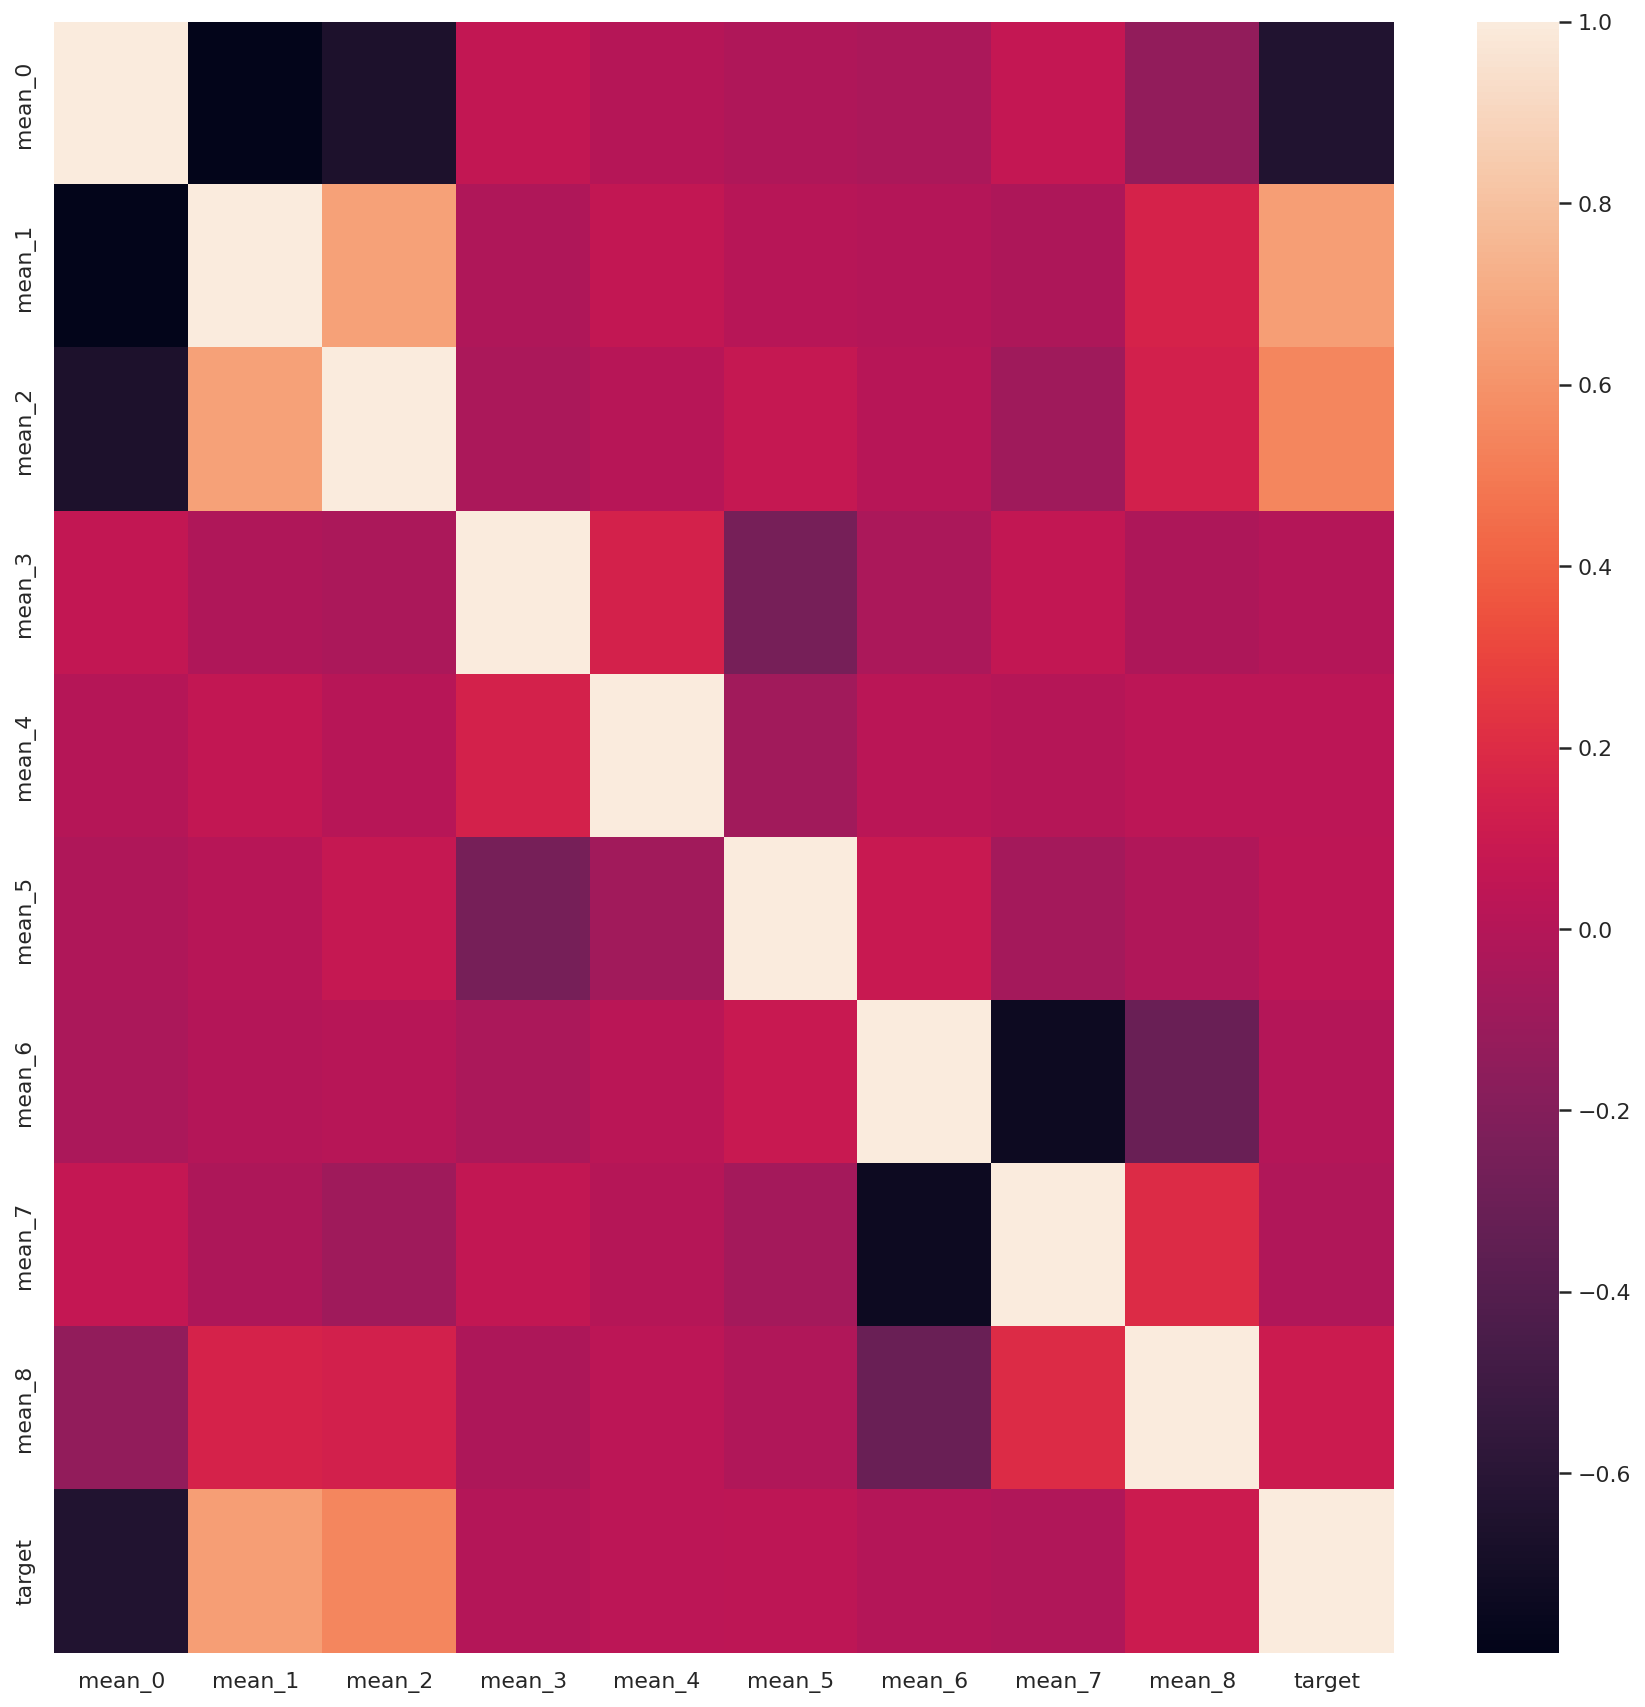

In [52]:
corr_matrix = df1[['mean_0','mean_1', 'mean_2', 'mean_3', 'mean_4', 'mean_5', 'mean_6', 'mean_7', 'mean_8', 'target']].corr()
sns.heatmap(corr_matrix);

Судя по корелляционной матрице, целевая переменная больше всего зависит от средних показаний 1-ого(обратно пропорционально), 2-ого и 3-его датчиков. Но это только предположение о наличии линейной зависимости.

### Dataset standartisation

In [53]:
standard_scaler = StandardScaler()

In [54]:
standard_scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
X_train_scaled = standard_scaler.transform(X)

In [56]:
X_train_scaled.shape

(7352, 1152)

In [57]:
## Standardizing the data
# for r in range(9):
#   print(r*128,(r+1)*128)
#   X_train_scaled[:,r*128:(r+1)*128] = StandardScaler().fit_transform(X[:,r*128:(r+1)*128])

In [58]:
pca1 = PCA(n_components=3)
pca_result1 = pca.fit_transform(X_train_scaled)

In [59]:
fig = px.scatter_3d(pca_result1, x=0, y=1, z=2,
              color=df_train['target'])
fig.show()

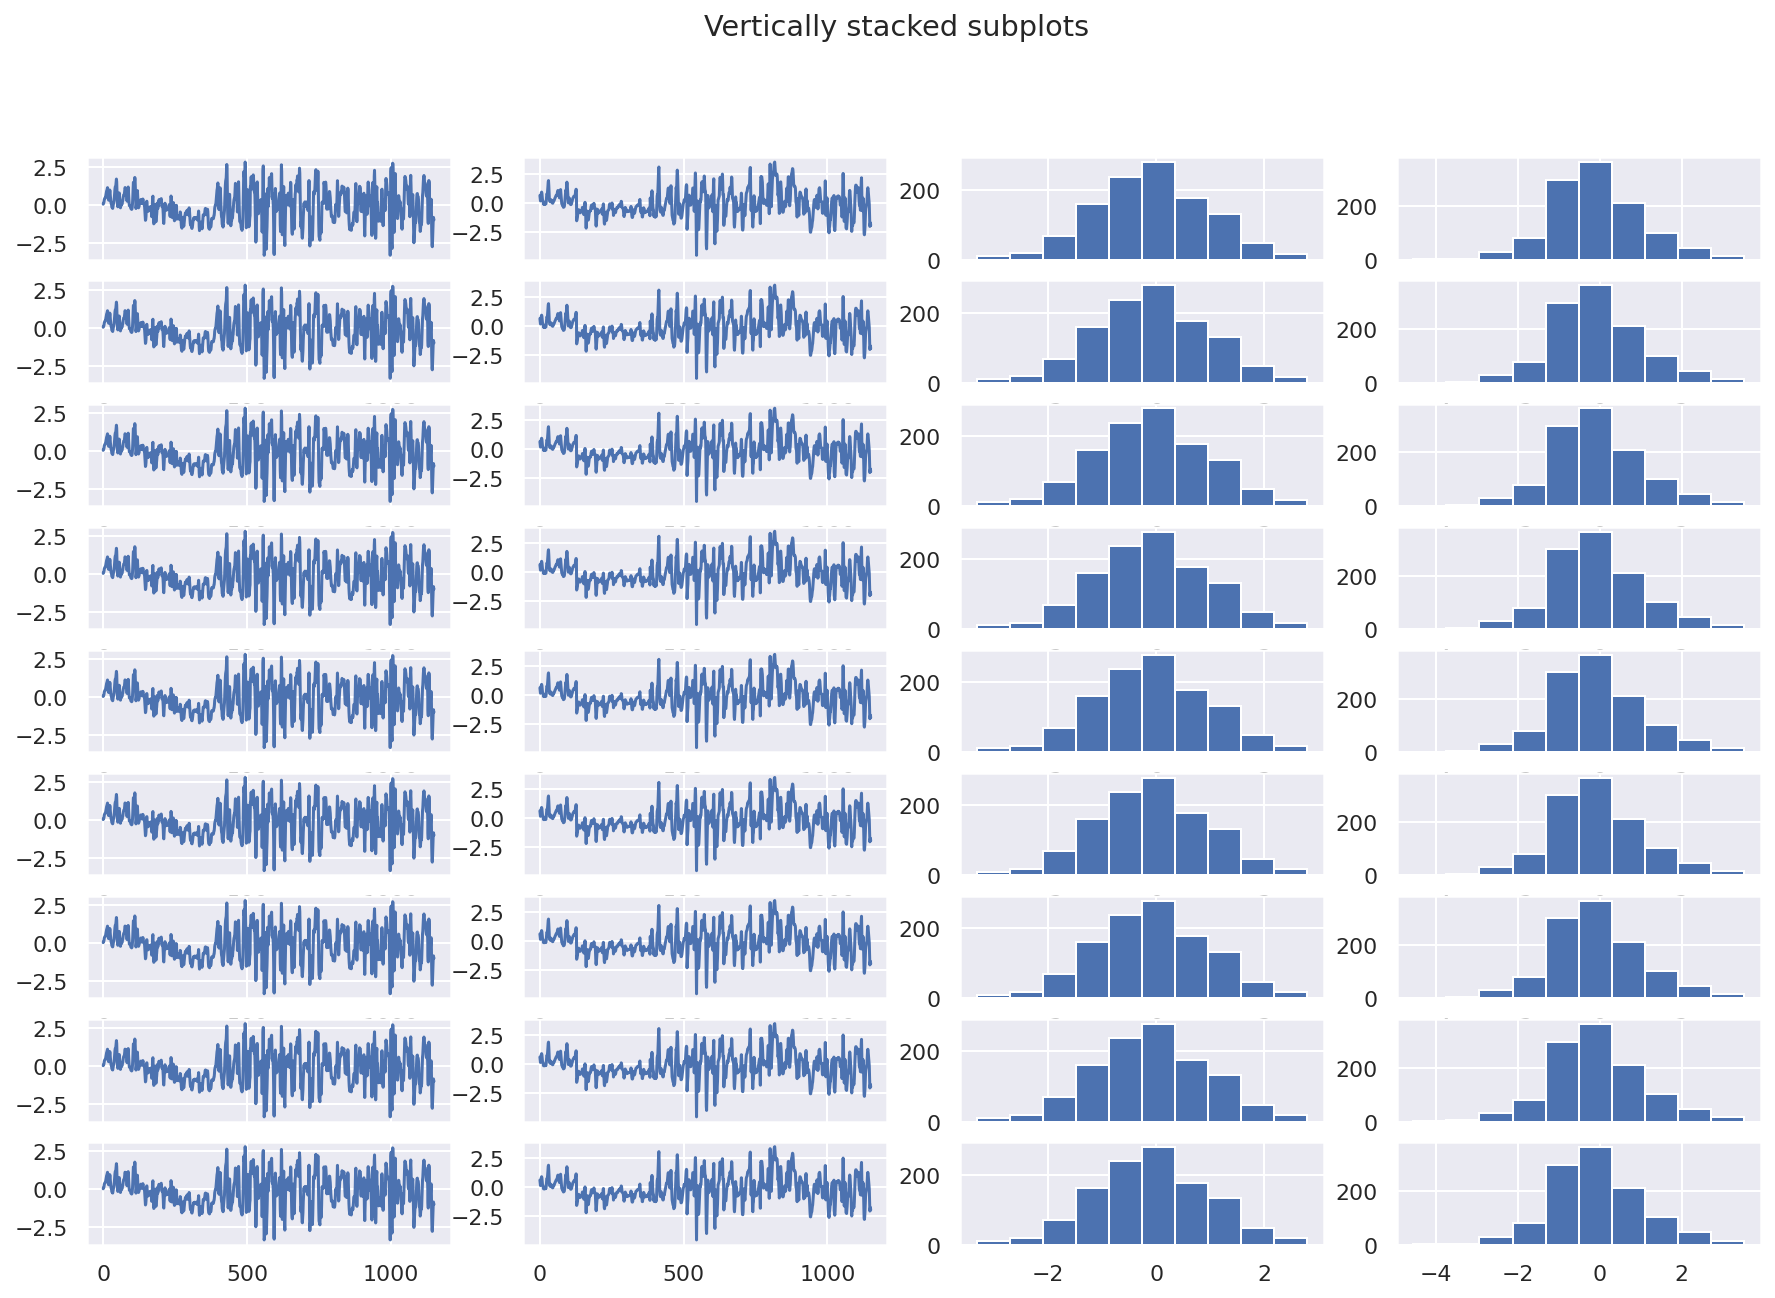

In [60]:
sens_count = 9

plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(sens_count,4)
fig.suptitle('Vertically stacked subplots')

for i in range(0,sens_count):
  axs[i,0].plot(X_train_scaled[3350,:])
  axs[i,1].plot(X_train_scaled[3529,:])
  axs[i,2].hist(X_train_scaled[3350,:])
  axs[i,3].hist(X_train_scaled[3529,:]) 

## SVM model

In [61]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [62]:
from sklearn.preprocessing import label_binarize

In [63]:
X=X_train_scaled

In [64]:
y = np.argmax(y_train, axis=1)

In [65]:
data_train, data_val, target_train, target_val = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [66]:
data_train.shape

(5881, 1152)

In [67]:
def calculate_metrics(target, pred, labels=[0,1,2,3,4,5]):  
  ps = precision_score(target, pred, average='weighted')  
  rs = recall_score(target, pred, average='weighted')
  target_bin = label_binarize(target, classes=labels)
  pred_bin = label_binarize(pred, classes=labels)
  raus = roc_auc_score(target_bin, pred_bin, multi_class='ovo')
  return f"""
            Precision: {(ps*100):.2f}
            Recall: {(rs*100):.2f}
            Roc Auc: {(raus*100):.2f}
          """

### Polynomial kernel

In [68]:
poly = svm.SVC(kernel='poly', degree=2, C=50, decision_function_shape='ovo', class_weight='balanced').fit(data_train, target_train)

In [69]:
poly_pred = poly.predict(data_val)

In [70]:
print(calculate_metrics(target_val, poly_pred))


            Precision: 93.56
            Recall: 93.27
            Roc Auc: 96.06
          


[[243   2   0   0   2   0]
 [  2 225   0   0   0   0]
 [  0   1 210   1   1   0]
 [  0   0   0 188  64   0]
 [  0   0   0  26 240   0]
 [  0   0   0   0   0 266]]


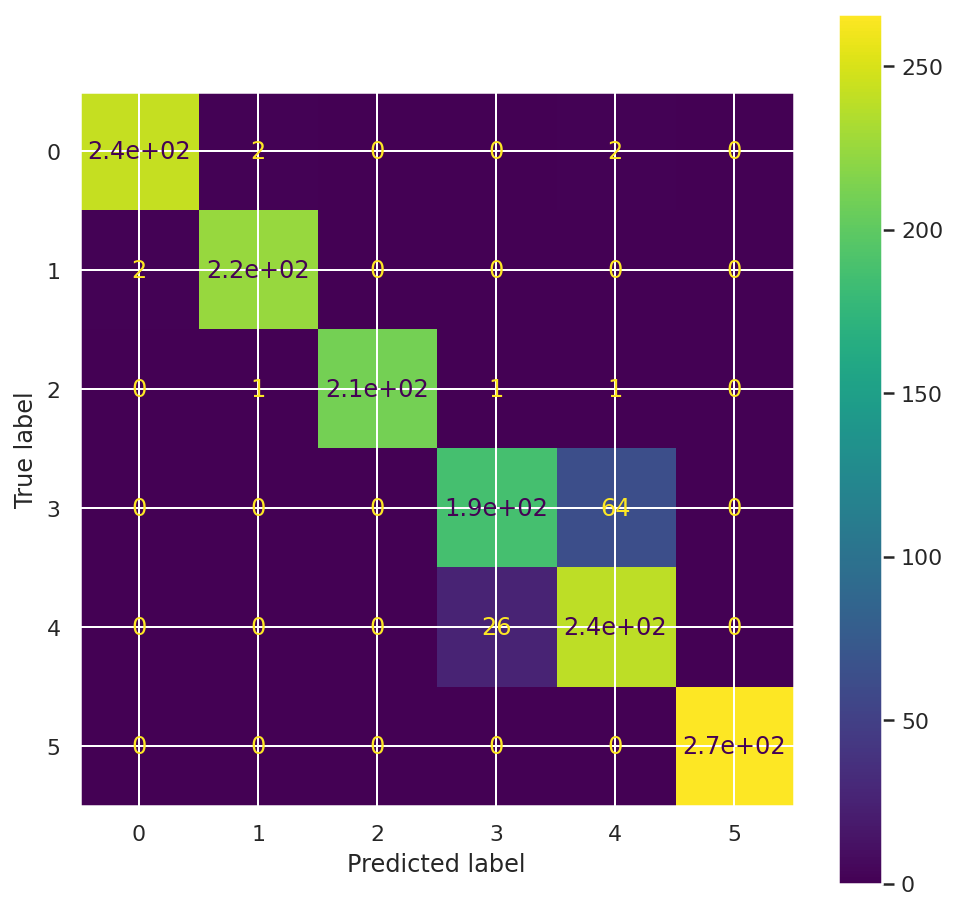

In [71]:
plt.rcParams["figure.figsize"] = (8,8)

cm = confusion_matrix(target_val, poly_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(6)))

disp.plot()
plt.show()

### RBF kernel

In [72]:
rbf = svm.SVC(kernel='rbf', gamma=0.0004, C=10).fit(data_train, target_train)

In [73]:
rbf_pred = rbf.predict(data_val)

In [74]:
print(calculate_metrics(target_val, rbf_pred))


            Precision: 94.30
            Recall: 94.22
            Roc Auc: 96.62
          


## Evaluate on test data

In [75]:
Xt = np.swapaxes(X_test,1,2).reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

In [76]:
target_test = np.argmax(y_test, axis=1)

In [77]:
X_test_scaled = standard_scaler.transform(Xt)

#### poly SVM

In [78]:
poly_pred_test = poly.predict(X_test_scaled)

In [79]:
print(calculate_metrics(target_test.ravel(), poly_pred_test.ravel()))


            Precision: 91.70
            Recall: 90.94
            Roc Auc: 94.57
          


#### RBF SVM

In [80]:
rbf_pred_test = rbf.predict(X_test_scaled)

In [81]:
print(calculate_metrics(target_test.ravel(), rbf_pred_test.ravel()))


            Precision: 90.33
            Recall: 90.30
            Roc Auc: 94.16
          


### retrain on full dataset and eval on test

In [82]:
rbf = svm.SVC(kernel='rbf', gamma=0.0004, C=10).fit(X, y)

In [83]:
rbf_pred_test1 = rbf.predict(X_test_scaled)

In [84]:
print(calculate_metrics(target_test, rbf_pred_test1))


            Precision: 91.15
            Recall: 91.11
            Roc Auc: 94.69
          


[[472   2  20   1   1   0]
 [  5 440  26   0   0   0]
 [ 16   3 401   0   0   0]
 [  1   8   1 379 102   0]
 [  2   0   0  74 456   0]
 [  0   0   0   0   0 537]]


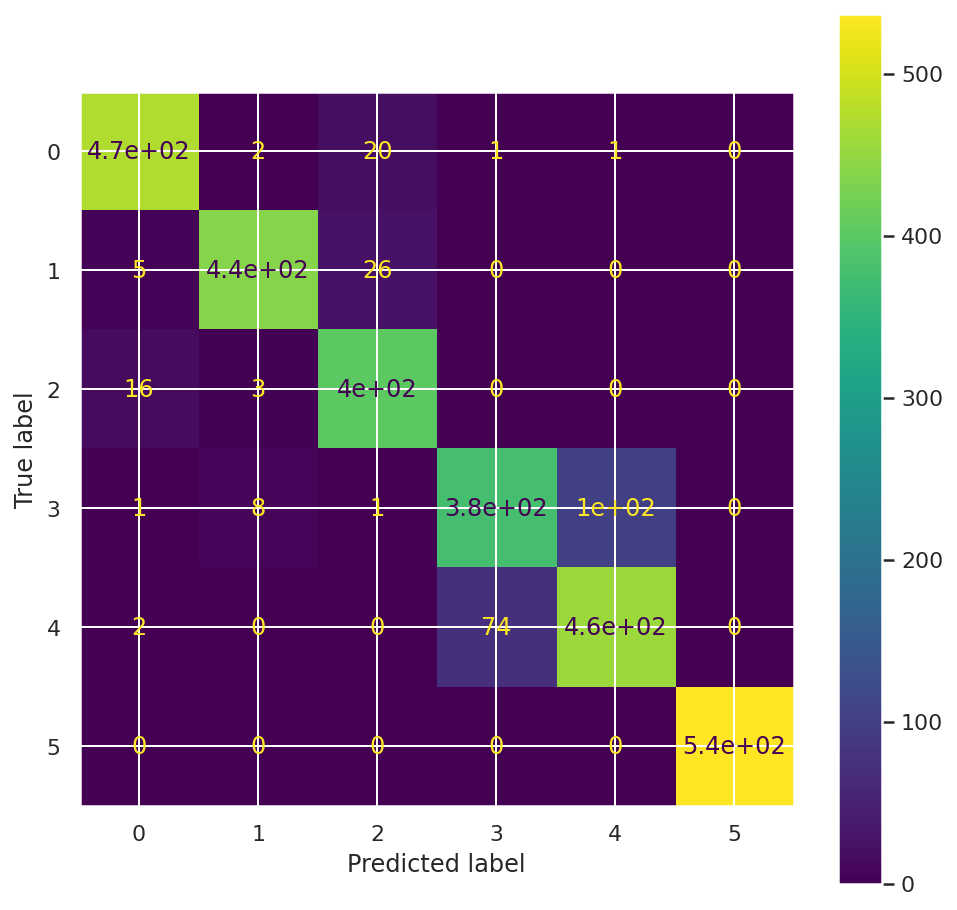

In [85]:
cm = confusion_matrix(target_test, rbf_pred_test1)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(6)))
disp.plot()
plt.show()

In [86]:
poly = svm.SVC(kernel='poly', degree=2, C=50, decision_function_shape='ovo', class_weight='balanced').fit(X, y)

In [87]:
poly_pred_test1 = poly.predict(X_test_scaled)

In [88]:
print(calculate_metrics(target_test, poly_pred_test1))


            Precision: 92.43
            Recall: 91.75
            Roc Auc: 95.10
          


[[446   2   3   3  42   0]
 [  4 463   0   3   1   0]
 [  2   2 401   5  10   0]
 [  0   1   0 401  89   0]
 [  0   0   0  49 483   0]
 [  0   0   0  27   0 510]]


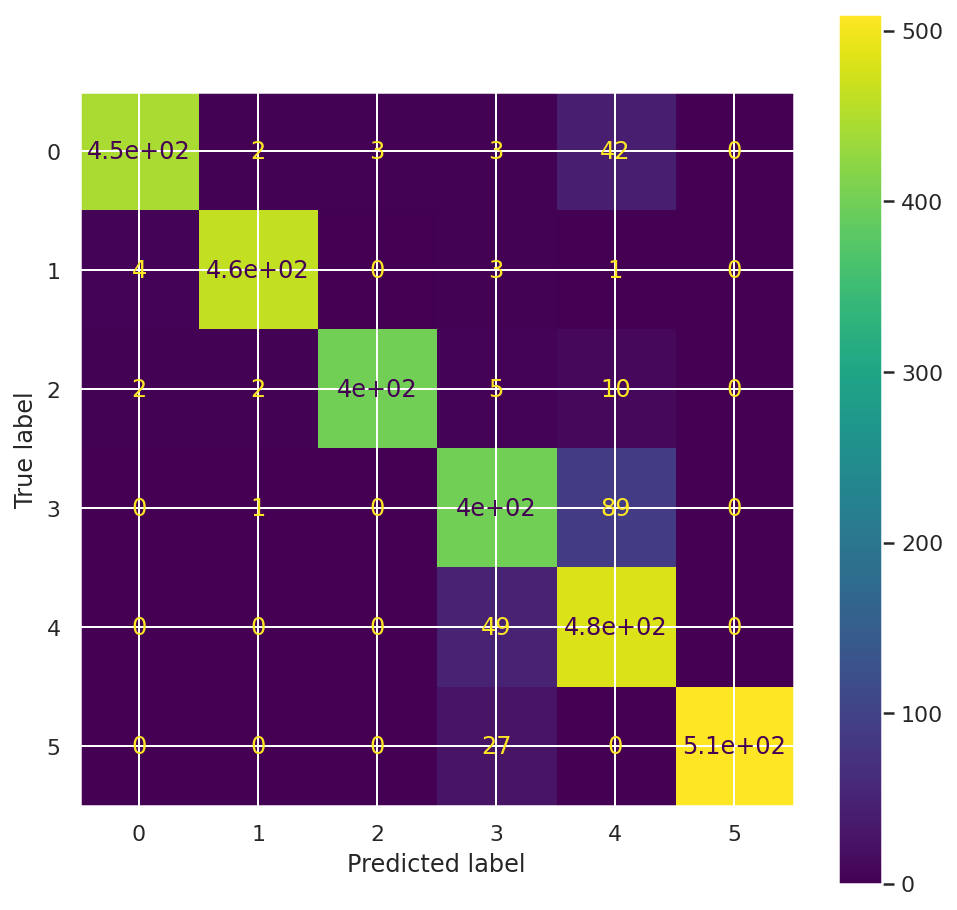

In [89]:
cm = confusion_matrix(target_test, poly_pred_test1)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(map(str,range(6))))
disp.plot()
plt.show()

Adding new features

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



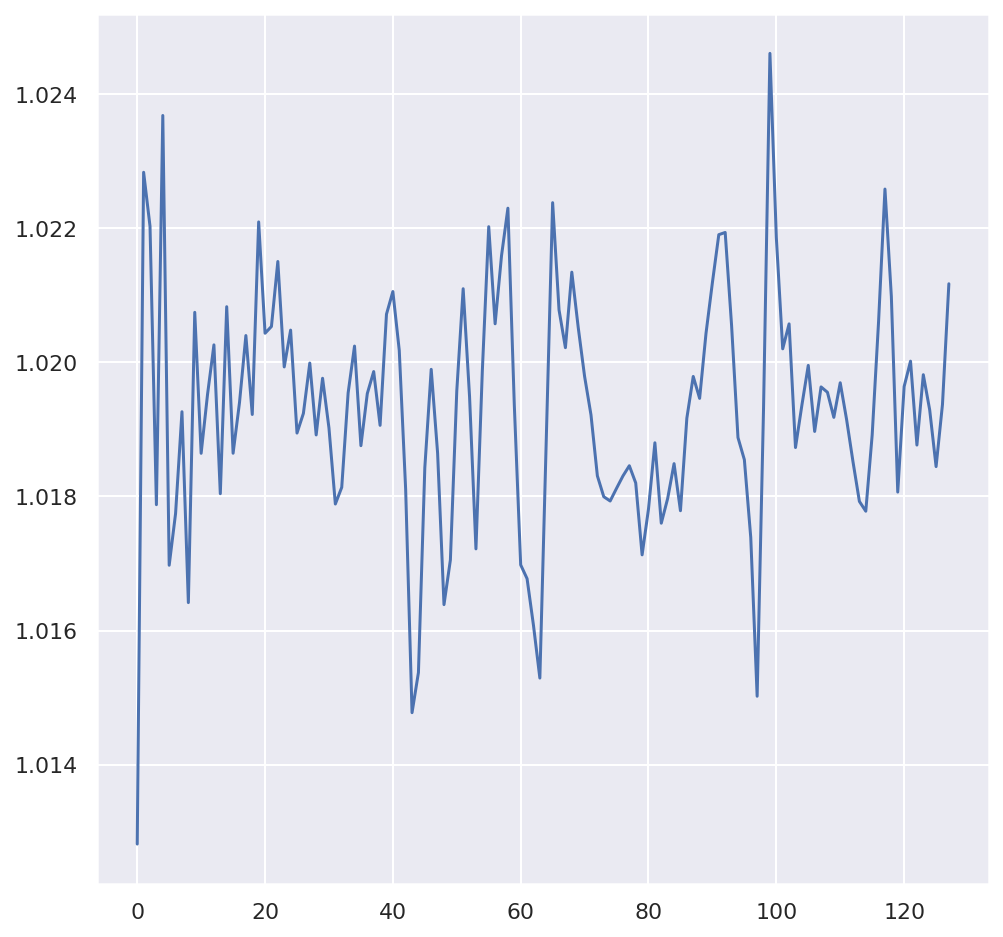

In [91]:
plt.plot(df_train[0].iloc[0])

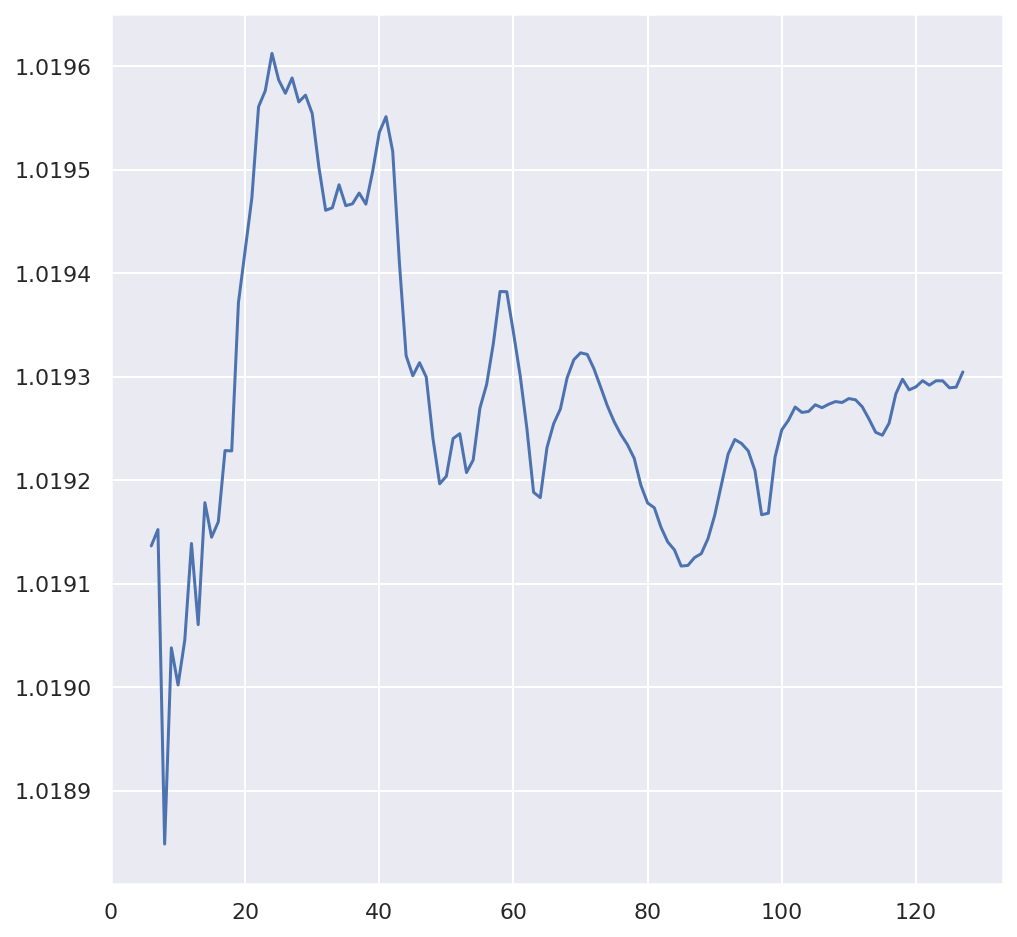

In [92]:
plt.plot(df_train[0].iloc[0].expanding(7).mean())

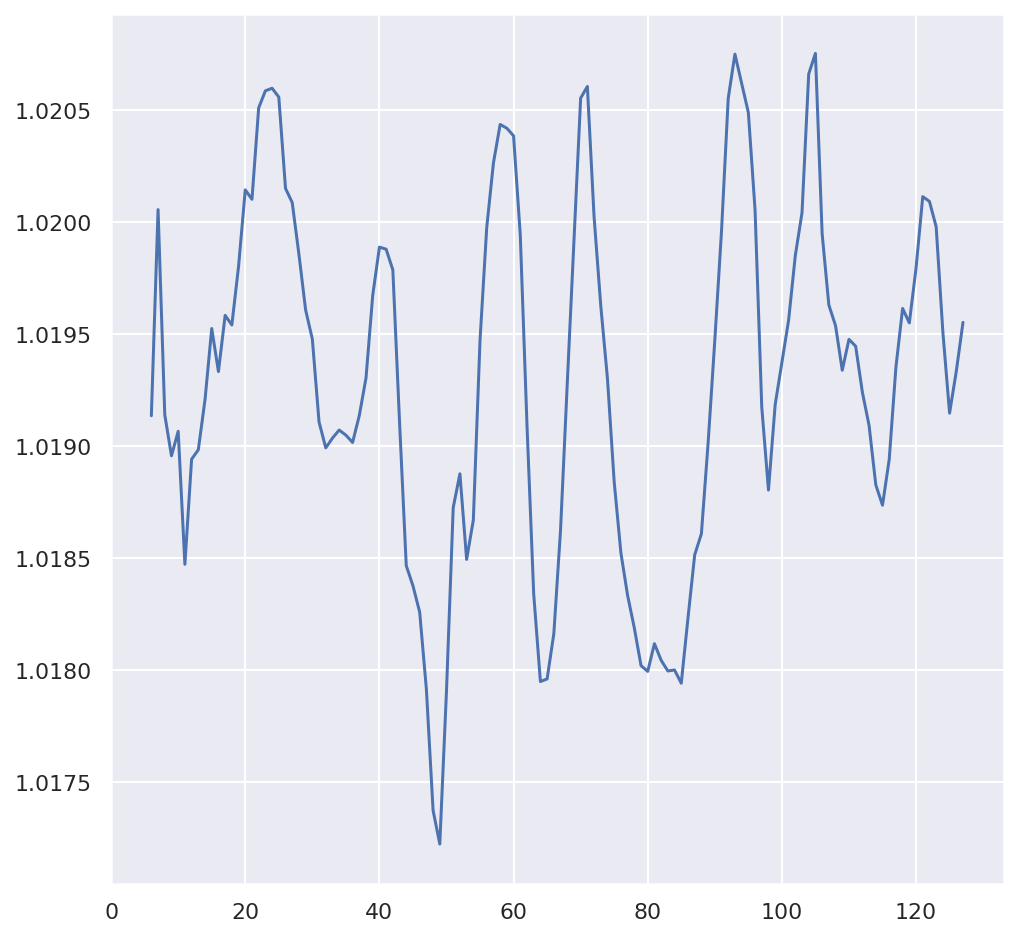

In [93]:
plt.plot(df_train[0].iloc[0].rolling(window=7).mean())

### Plot partial- and autocorellations for sensors' series

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



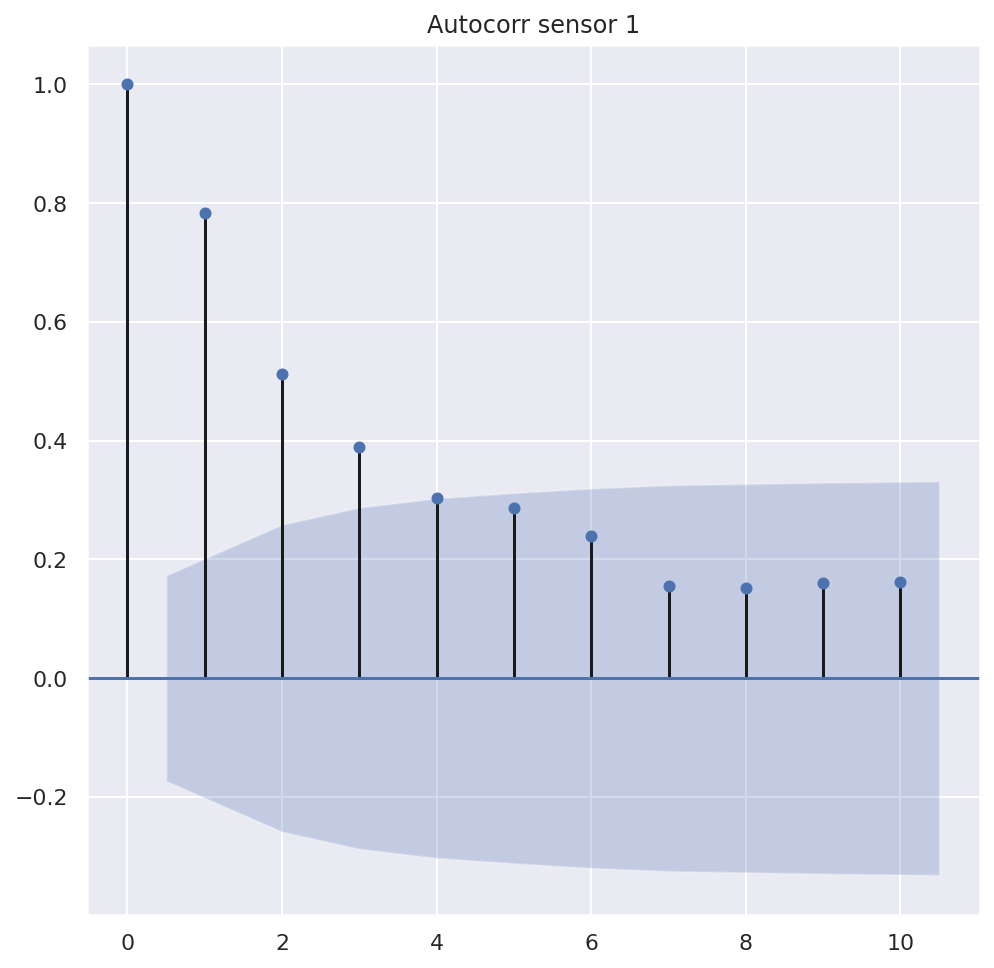

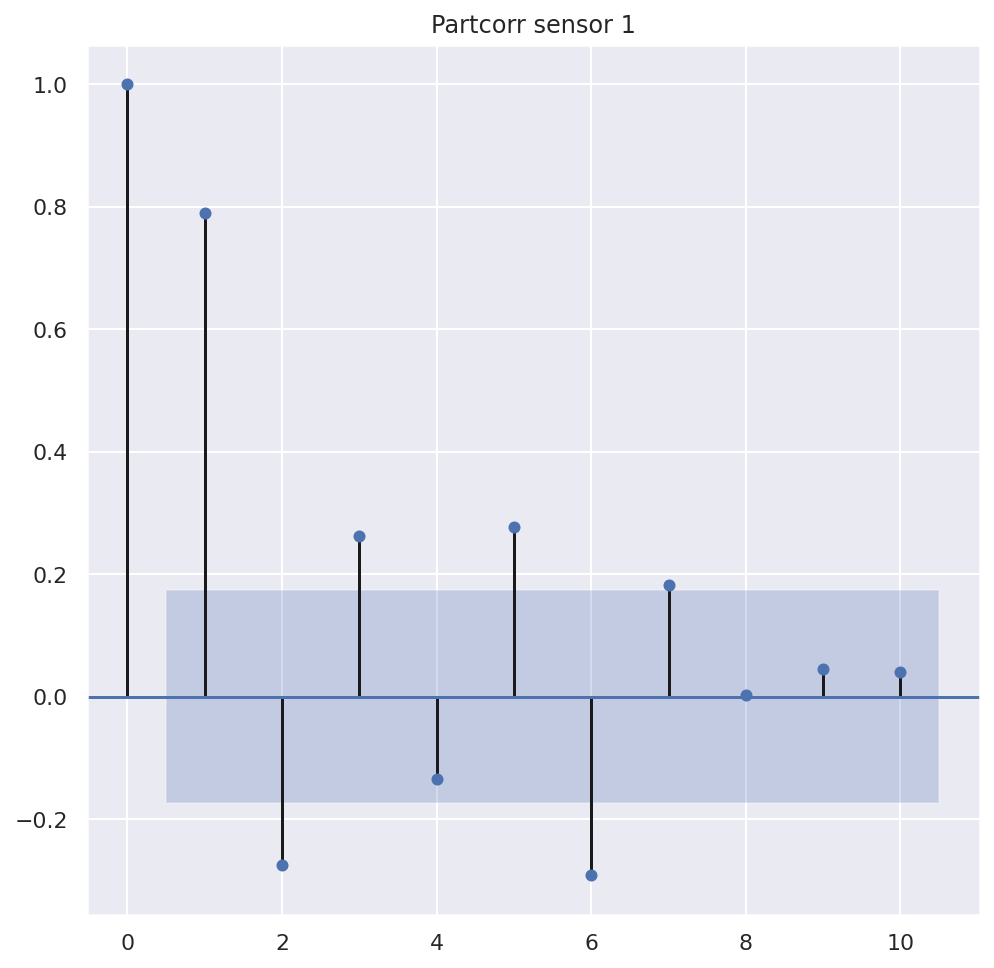

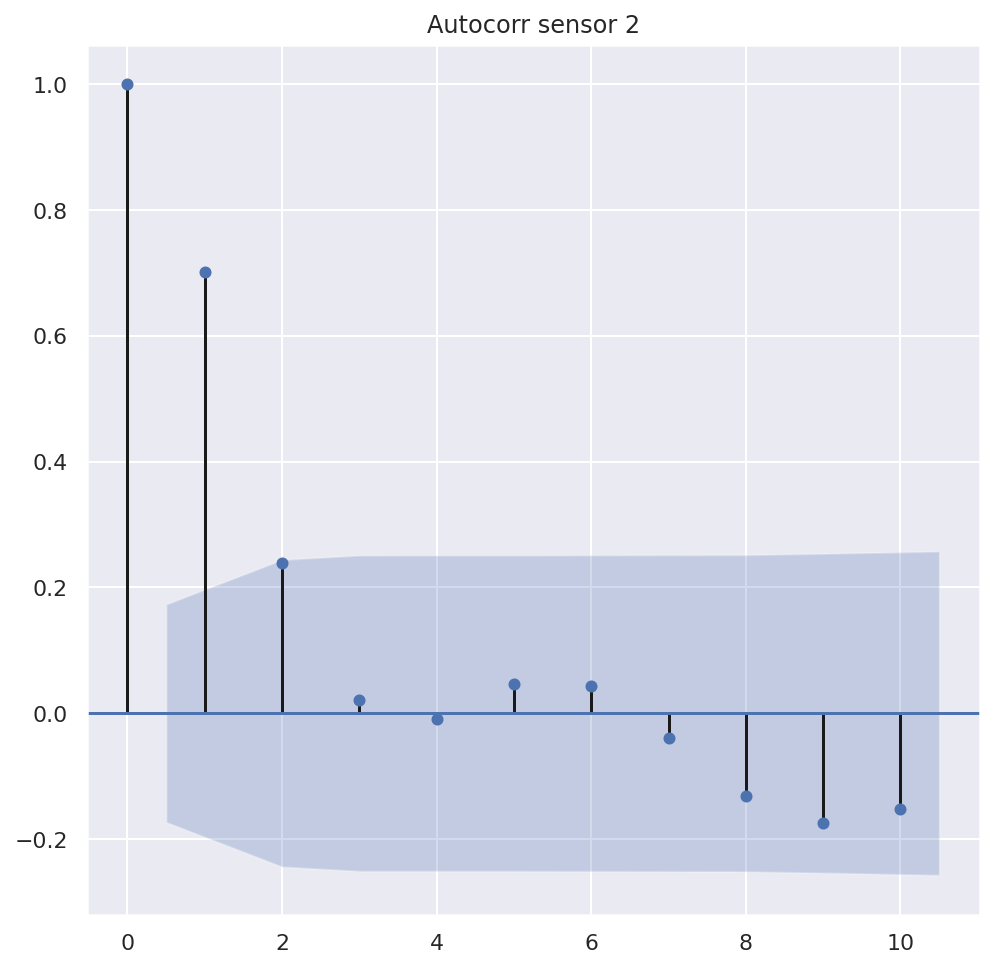

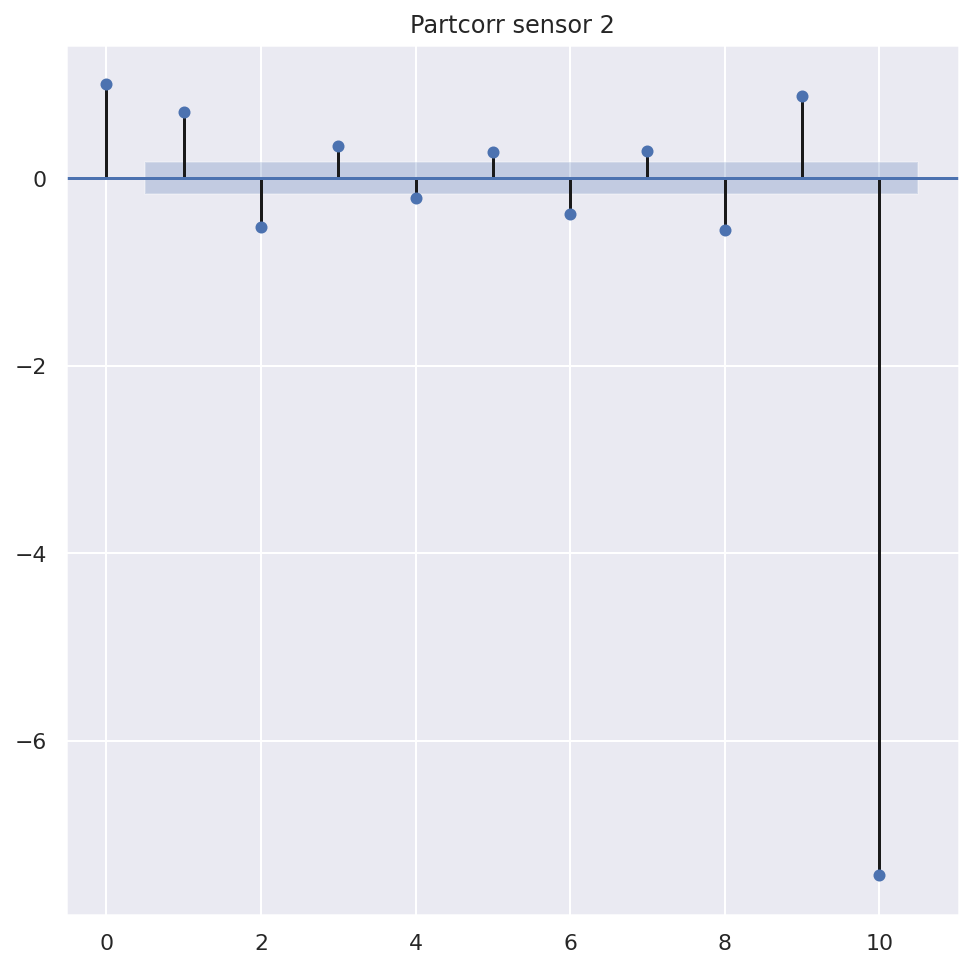

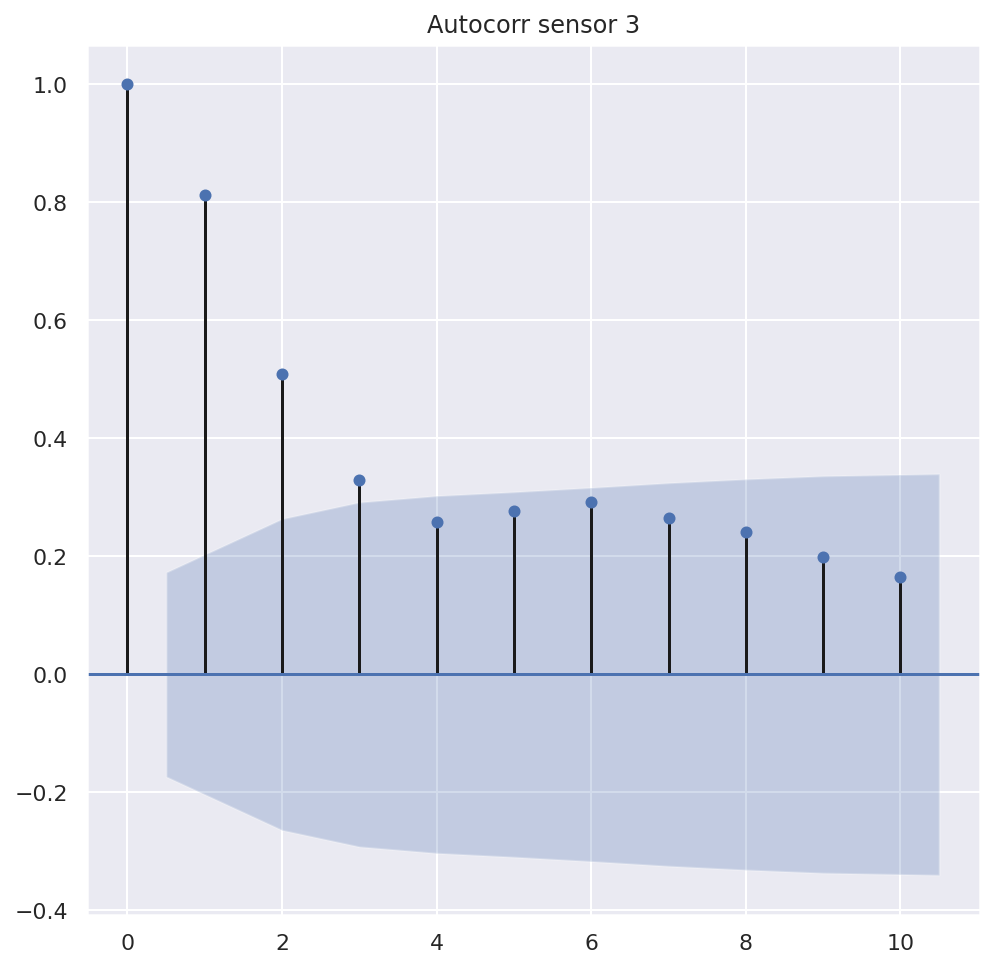

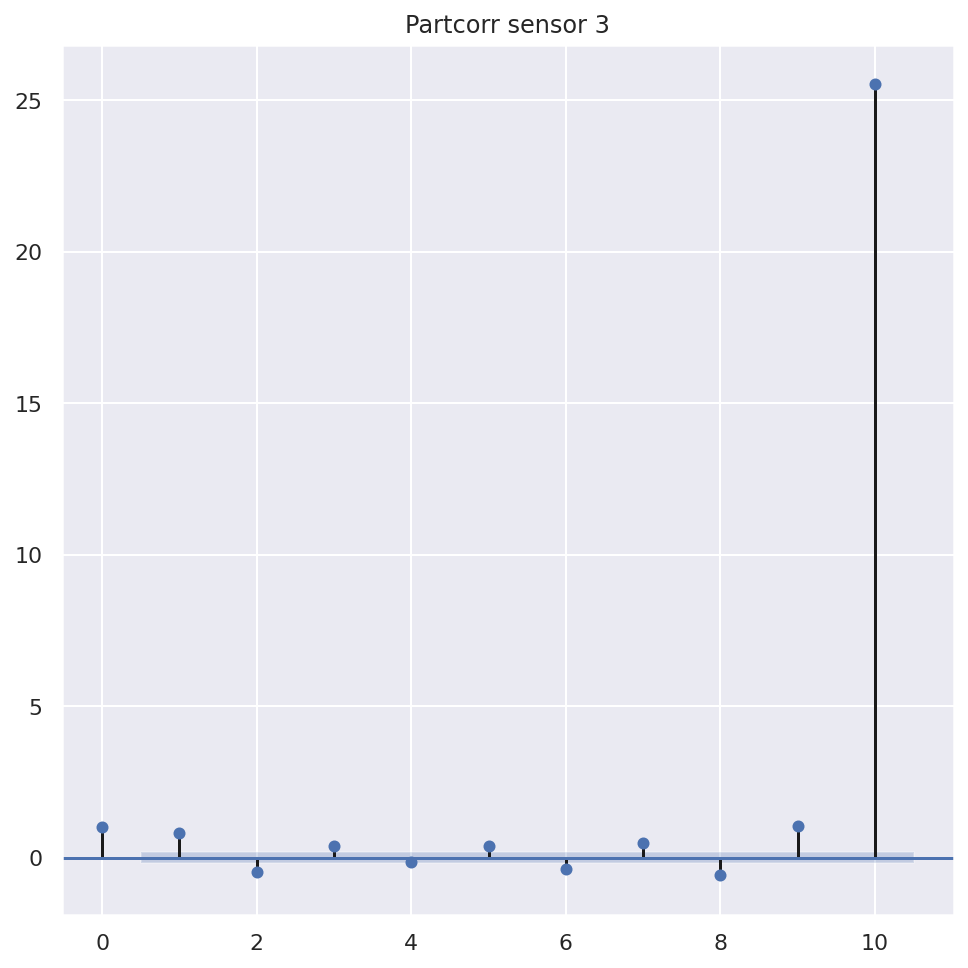

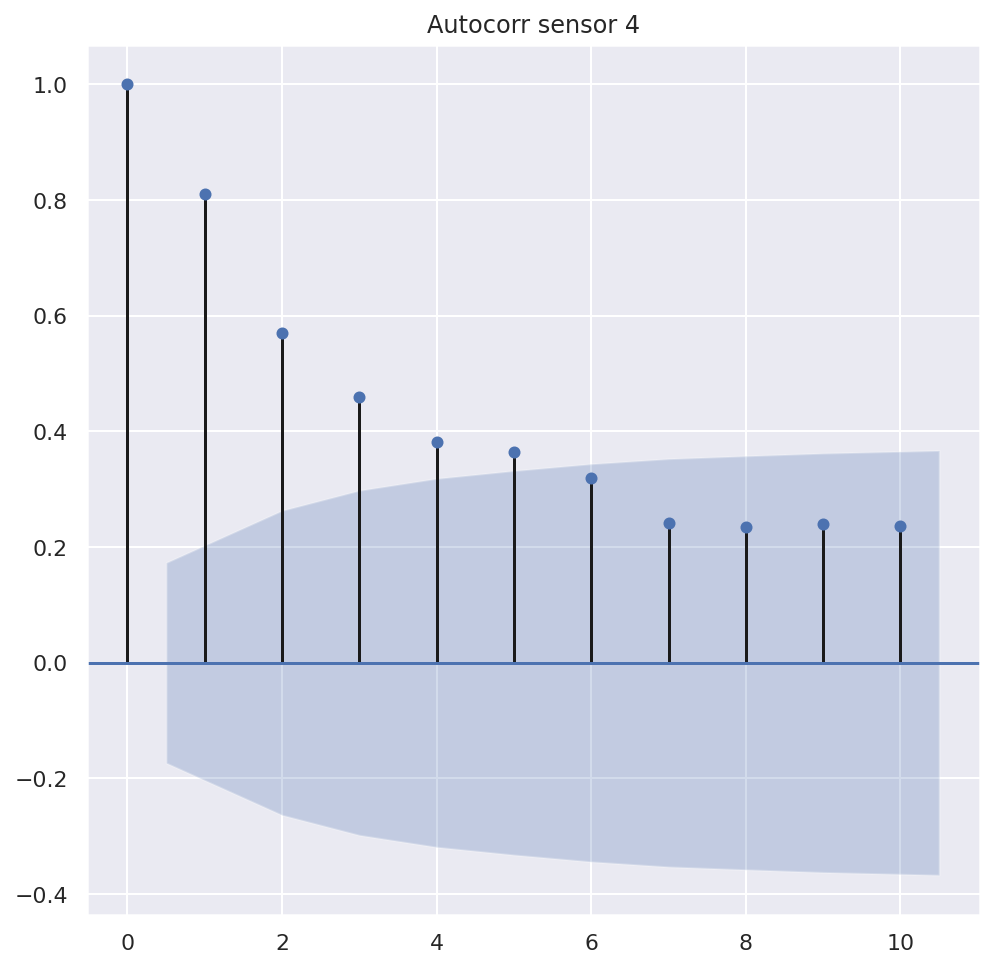

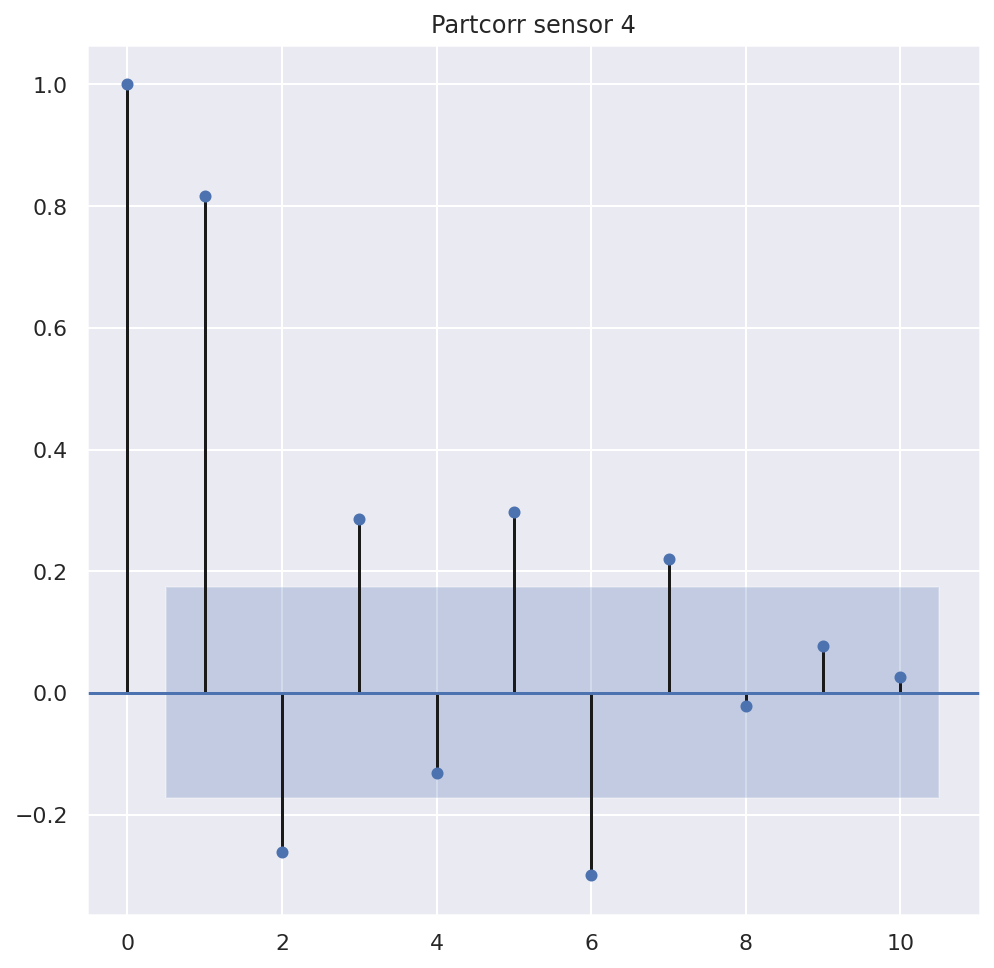

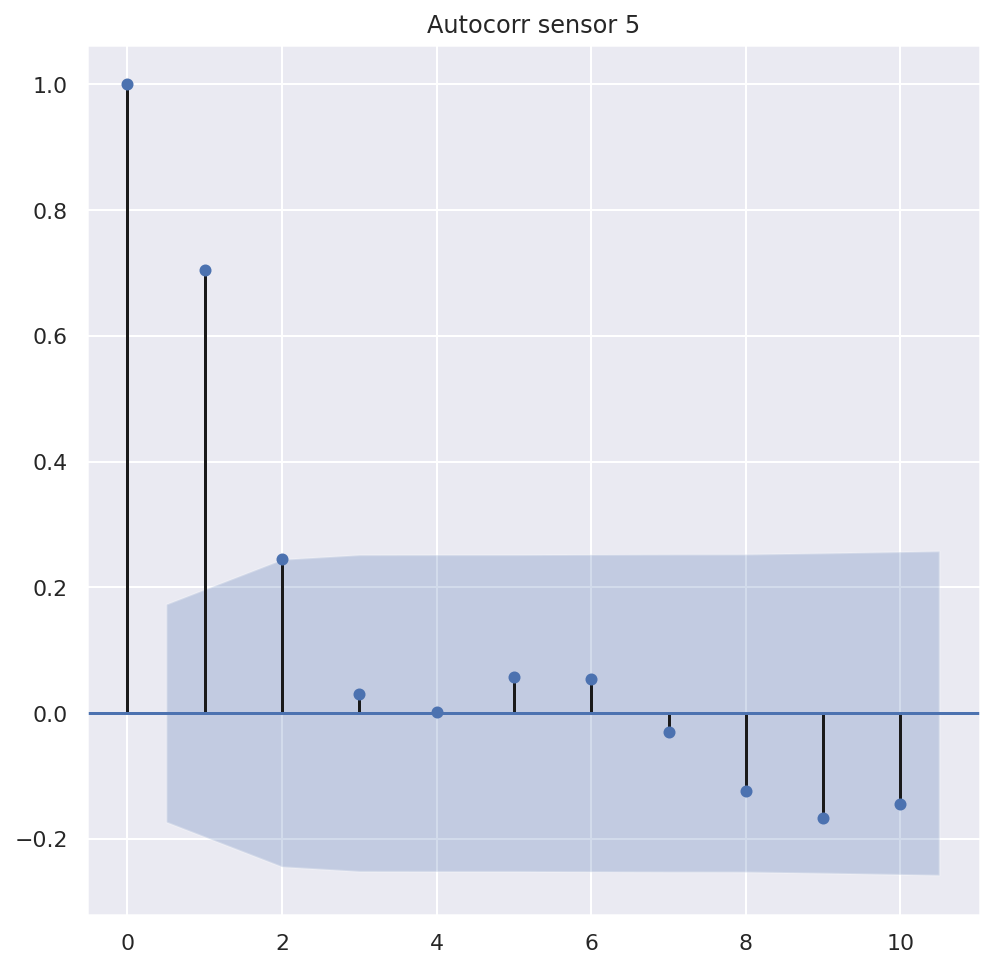

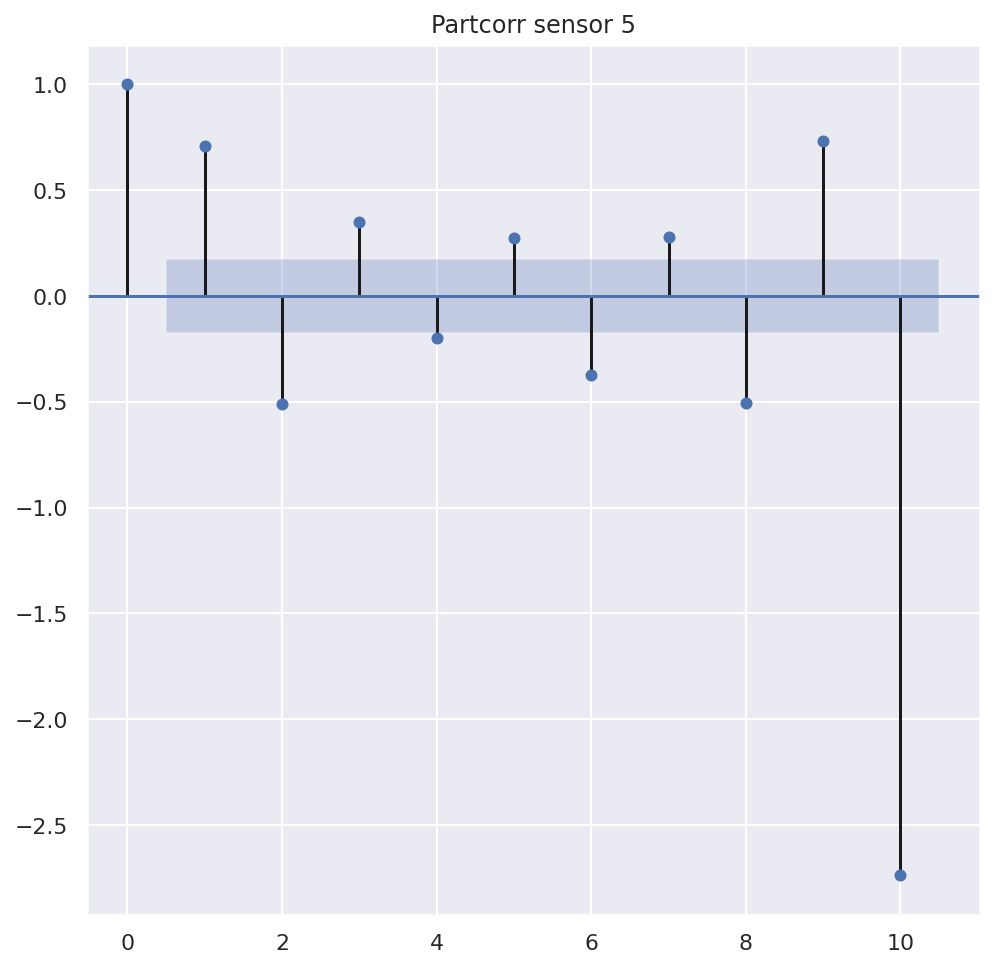

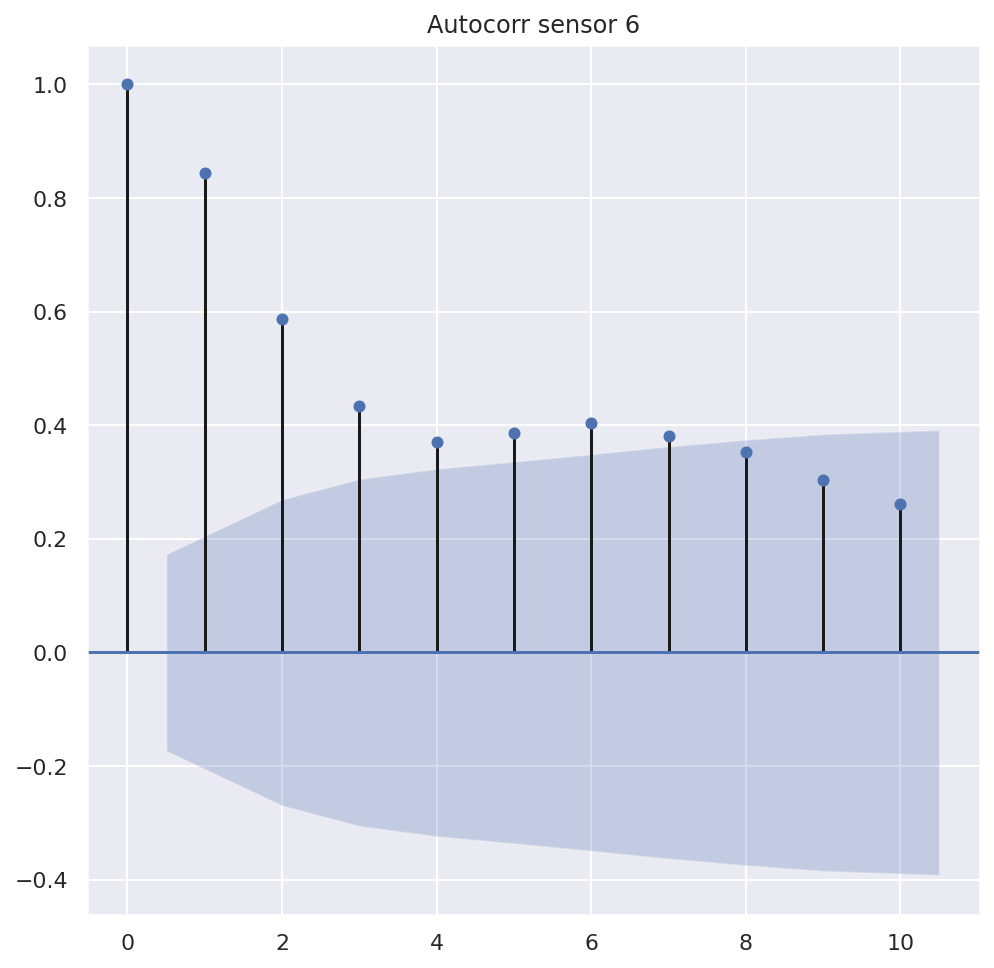

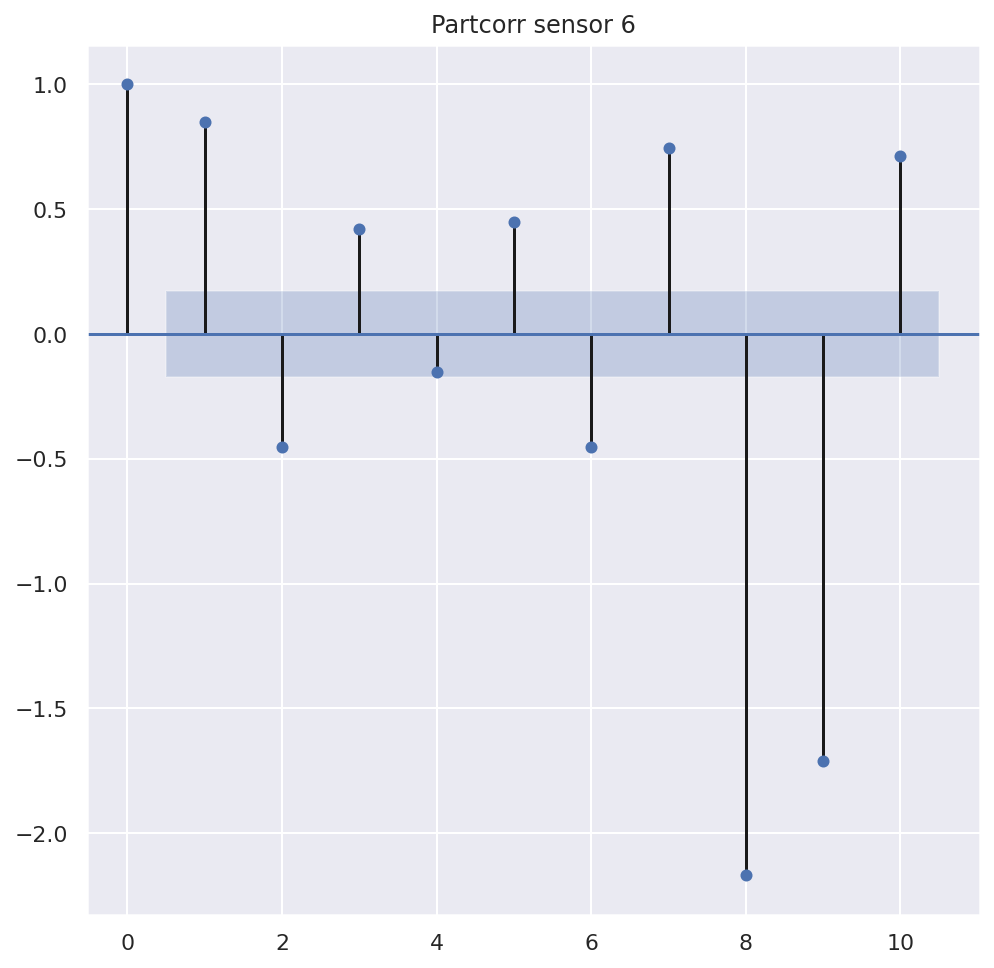

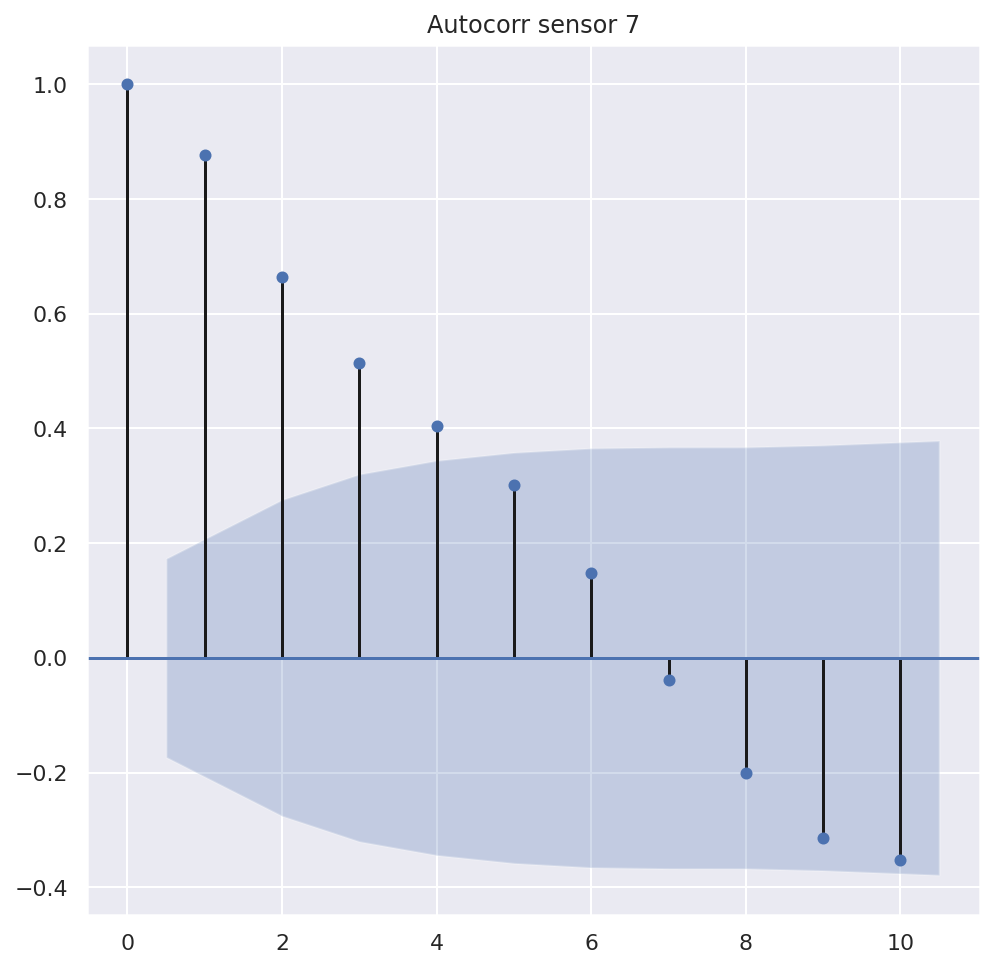

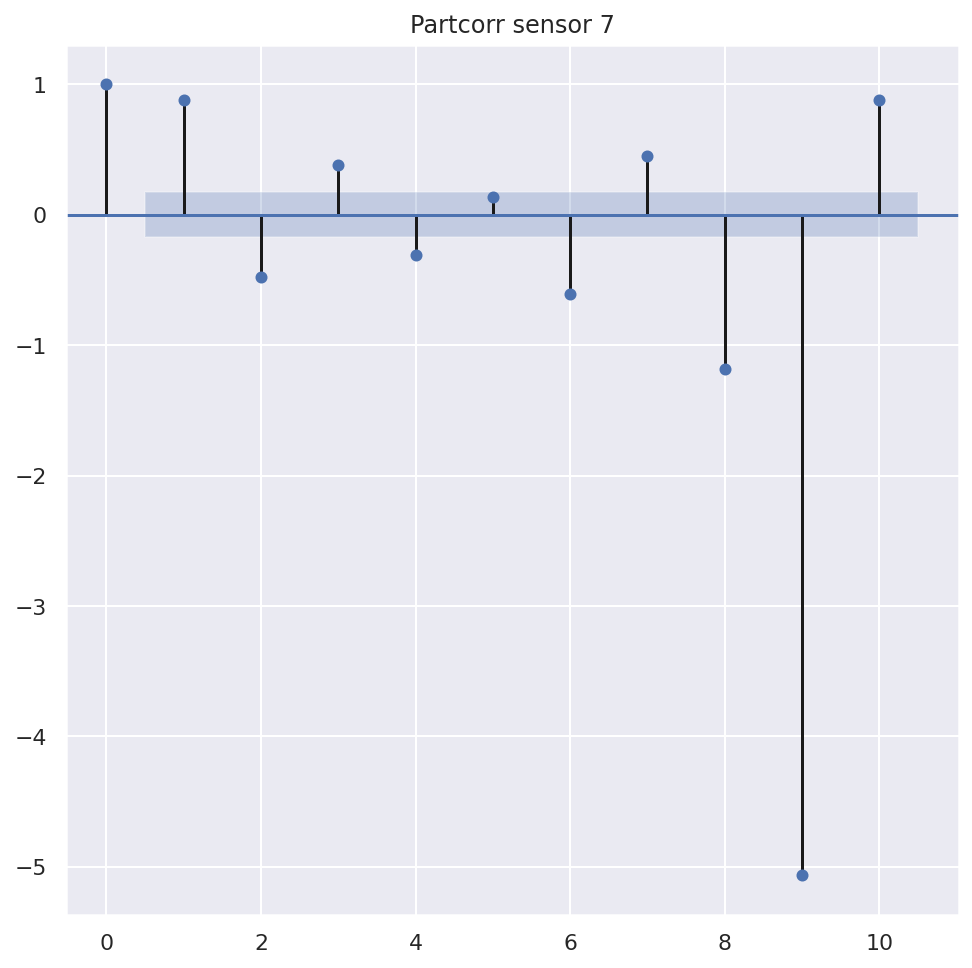

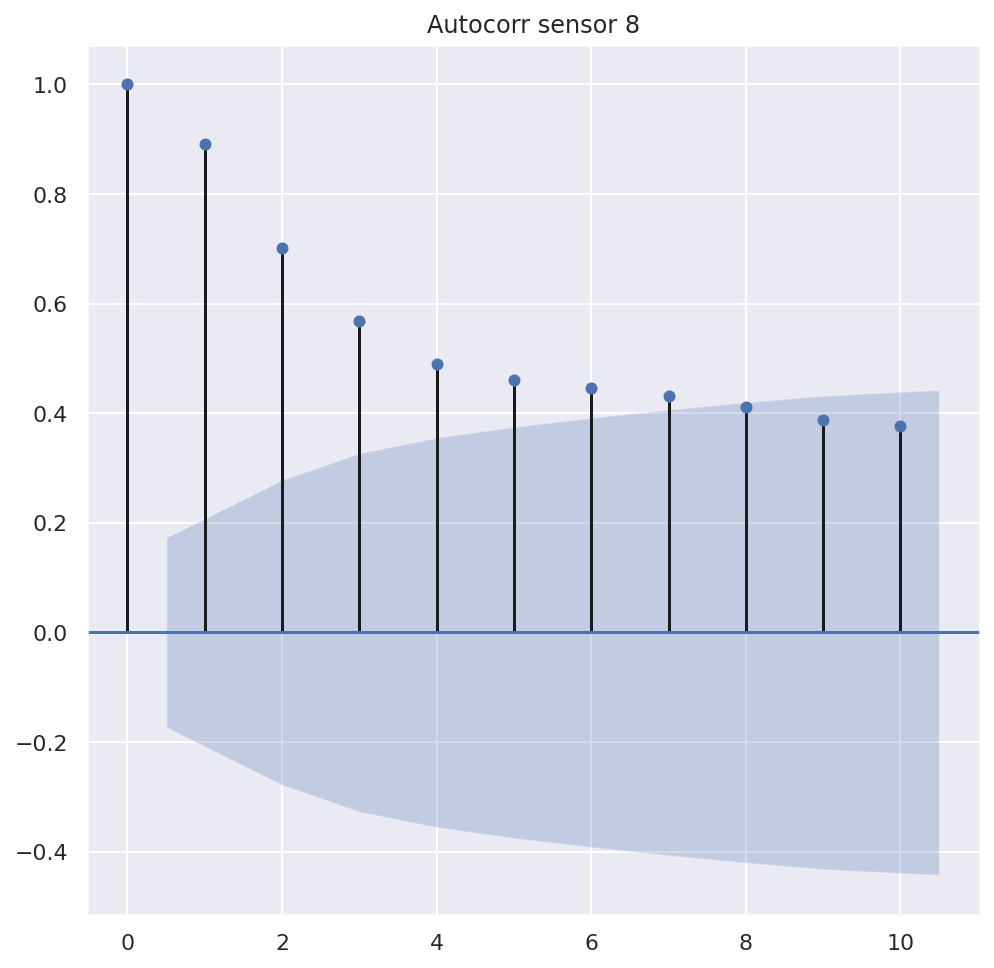

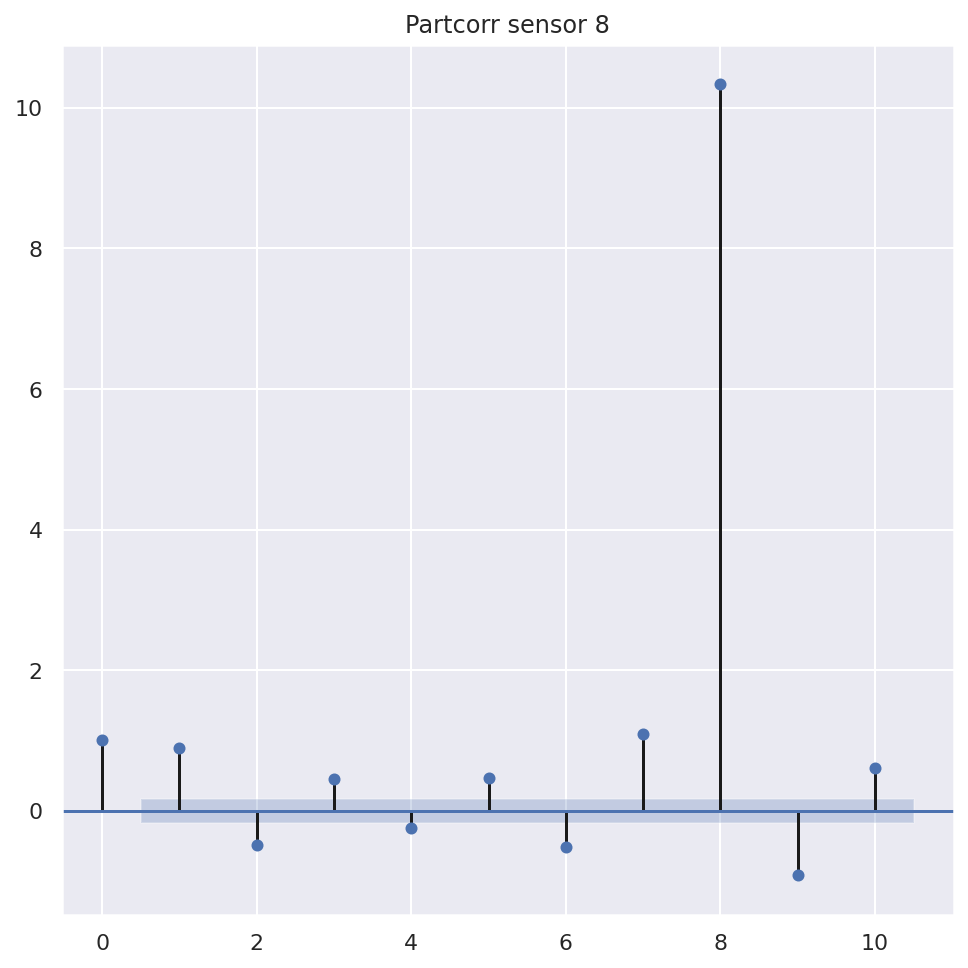

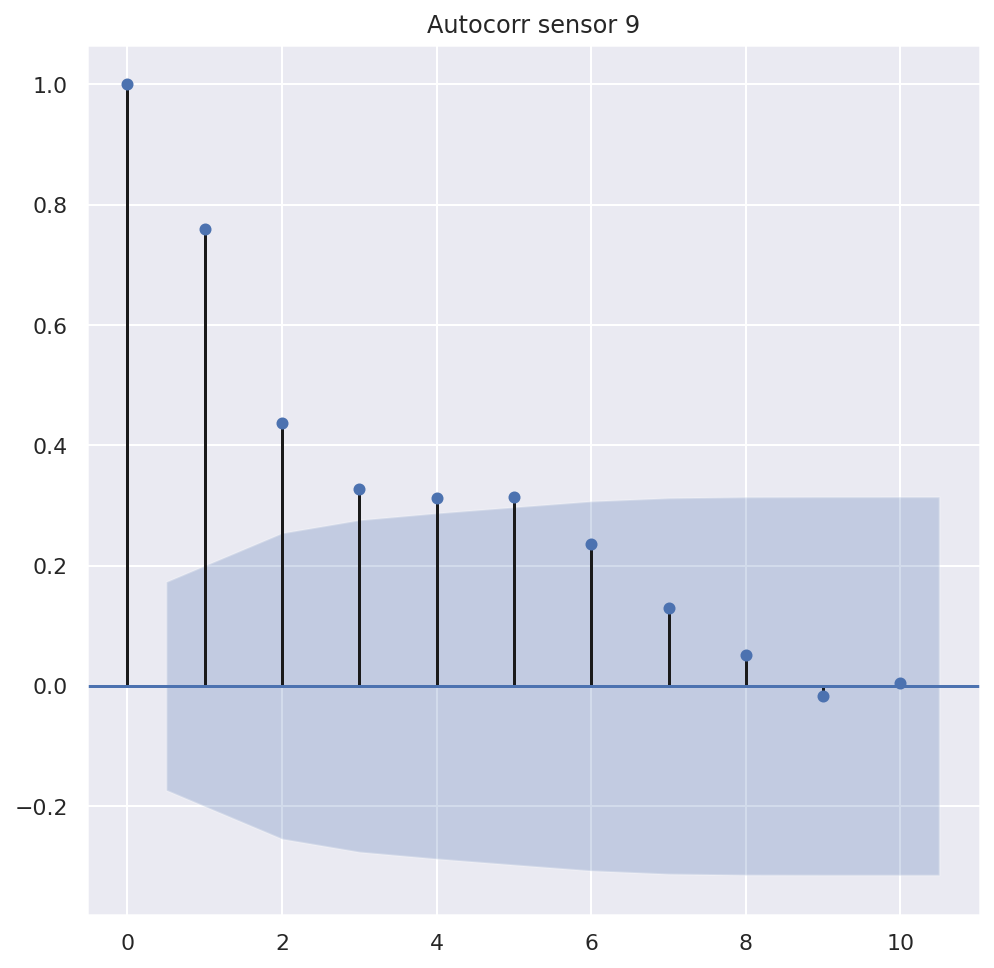

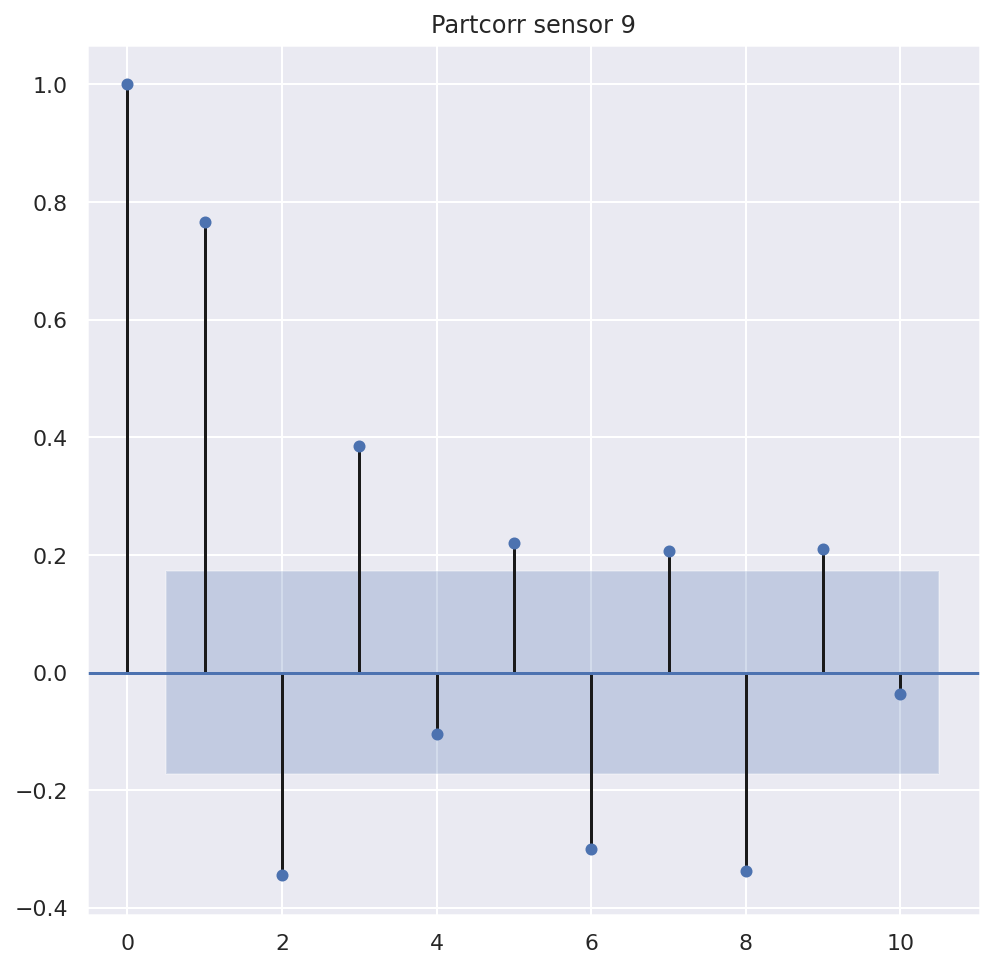

In [94]:
for i in range(9):  
  _=plot_acf(df_train[i].iloc[1000], lags=10, title="Autocorr sensor {}".format(i+1))
  _=plot_pacf(df_train[i].iloc[1000], lags=10, title="Partcorr sensor {}".format(i+1))

In [95]:
acf(df_train[0].iloc[1000],fft=False)

array([ 1.        ,  0.78399427,  0.51259152,  0.38880114,  0.30290588,
        0.28722302,  0.23861424,  0.15456145,  0.1514451 ,  0.16017928,
        0.16203346,  0.20846815,  0.24648121,  0.2236104 ,  0.1933685 ,
        0.16141829,  0.10616929,  0.06443139, -0.01079172, -0.09702773,
       -0.11508502, -0.13652834, -0.15943783, -0.1348688 , -0.13117908,
       -0.1302367 , -0.08272553, -0.06674925, -0.09320261, -0.09602862,
       -0.06695868, -0.01137309,  0.02036728,  0.0081874 , -0.01158771,
       -0.06096721, -0.0983642 , -0.08922815, -0.08688027, -0.07596238,
       -0.06056458])

In [96]:
df_train.drop(['target'],axis=1)

sensor         0                      ...         8                    
val          0         1         2    ...       125       126       127
0       1.012817  1.022833  1.022028  ... -0.002170 -0.005643 -0.001446
1       1.018851  1.022380  1.020781  ...  0.005045 -0.004424 -0.002798
2       1.023127  1.021882  1.019178  ... -0.005566 -0.003702 -0.002645
3       1.017682  1.018149  1.019854  ... -0.008408 -0.011158 -0.012987
4       1.019952  1.019616  1.020933  ... -0.004491 -0.003441 -0.010082
...          ...       ...       ...  ...       ...       ...       ...
7347    1.374753  1.604501  1.759656  ...  0.105364  0.192774  0.251018
7348    1.713028  1.709944  1.321608  ...  0.319005  0.231496  0.234651
7349    0.754892  0.804314  0.831714  ...  0.254344  0.281431  0.254206
7350    0.927927  0.912987  0.924660  ...  0.176212  0.163561  0.188734
7351    0.798091  0.819242  0.865882  ... -0.362512 -0.383989 -0.335884

[7352 rows x 1152 columns]

In [97]:
df_train_acorr = pd.DataFrame(X.copy())
s_list = [df_train_acorr]
for i in range(9):
  s_list.append(df_train_acorr.apply(lambda x: pd.Series(acf(x, fft=False)[1:], index=["acf"+str(i+1)+str(j+1) for j in range(40)]), axis=1))
df_train_acorr = pd.concat(s_list, axis=1)

In [98]:
df_test_acorr = pd.DataFrame(X_test_scaled)
s_list = [df_test_acorr]
for i in range(9):
  s_list.append(df_test_acorr.apply(lambda x: pd.Series(acf(x, fft=False)[1:], index=["acf"+str(i+1)+str(j+1) for j in range(40)]), axis=1))
df_test_acorr = pd.concat(s_list, axis=1)

In [108]:
poly = svm.SVC(kernel='poly', degree=2, C=100, decision_function_shape='ovo', class_weight='balanced').fit(df_train_acorr, y)

In [109]:
poly_pred_test = poly.predict(df_test_acorr)

In [110]:
print(calculate_metrics(target_test, poly_pred_test))


            Precision: 92.71
            Recall: 92.26
            Roc Auc: 95.43
          


[[487   2   3   0   4   0]
 [  6 462   2   1   0   0]
 [  4   3 412   0   1   0]
 [  0   2   0 373 116   0]
 [  0   0   0  57 475   0]
 [  0   1   0   0  26 510]]


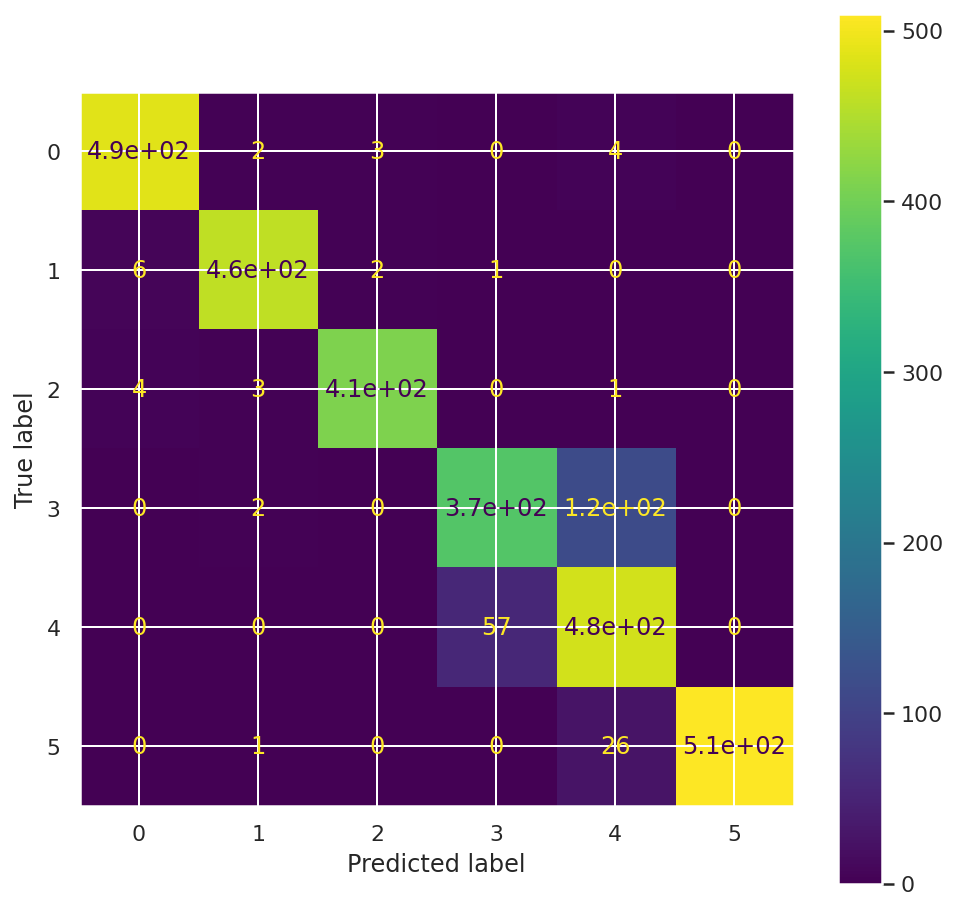

In [111]:
cm = confusion_matrix(target_test, poly_pred_test)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(6)))
disp.plot()
plt.show()

In [128]:
rbf = svm.SVC(kernel='rbf', gamma=0.0005, C=100, class_weight='balanced').fit(df_train_acorr, y)

In [129]:
rbf_pred_test = rbf.predict(df_test_acorr)

In [130]:
print(calculate_metrics(target_test, rbf_pred_test))


            Precision: 92.26
            Recall: 92.13
            Roc Auc: 95.31
          


[[477   1  18   0   0   0]
 [  2 448  21   0   0   0]
 [  9   3 408   0   0   0]
 [  0   3   1 375 112   0]
 [  1   0   0  61 470   0]
 [  0   0   0   0   0 537]]


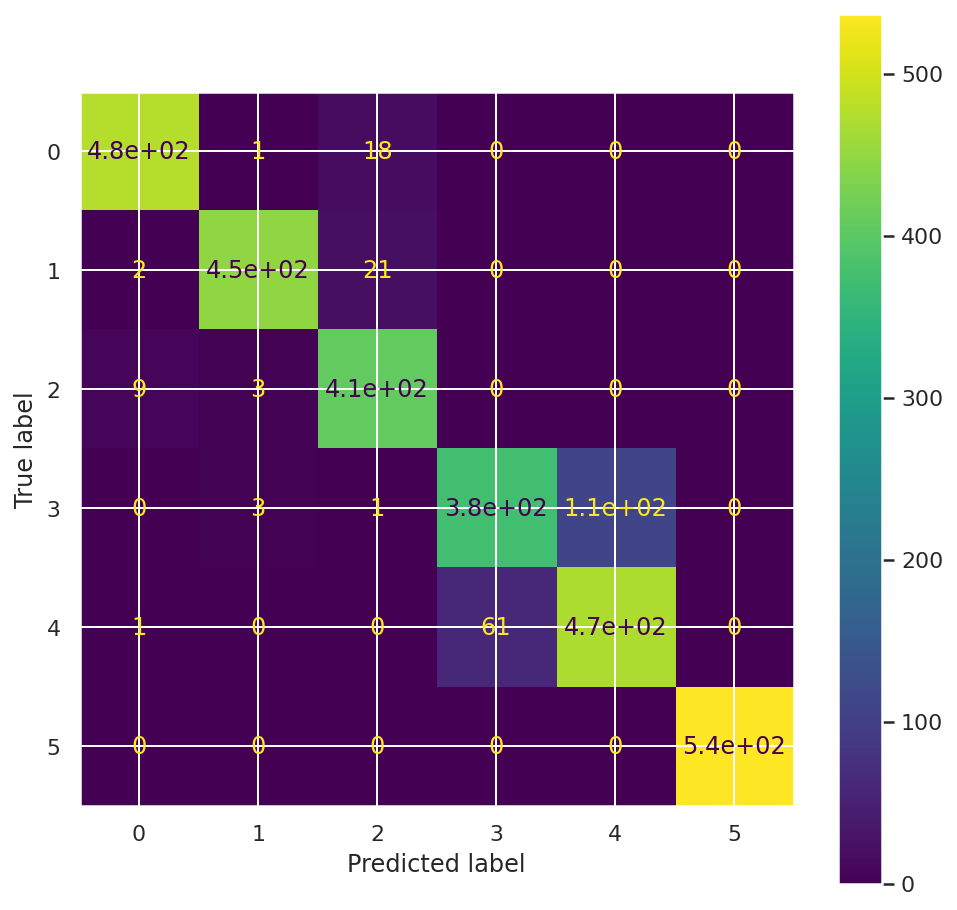

In [131]:
cm = confusion_matrix(target_test, rbf_pred_test)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(6)))
disp.plot()
plt.show()